In [1]:
# Selalu awali dengan import-import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load data
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Dari dataset tersebut terdapat beberapa fitur sebagai berikut:

**Pregnancies**: Jumlah kehamilan yang dialami oleh individu. Ini adalah faktor yang dapat memengaruhi risiko diabetes.


**Glucose**: Level glukosa darah (kadar gula darah) dalam tes darah. Glukosa yang tinggi bisa menjadi indikator diabetes.


**BloodPressure**: Tekanan darah diukur dalam milimeter merkuri (mmHg). Tekanan darah tinggi bisa terkait dengan risiko diabetes.


**SkinThickness**: Ketebalan lipatan kulit (biasanya di area triceps) yang diukur dengan kaliper. Ini bisa digunakan untuk menilai resistensi insulin.


**Insulin**: Kadar insulin dalam darah. Insulin berfungsi untuk mengontrol kadar gula dalam darah, dan ketidakseimbangan dapat mengindikasikan masalah dengan metabolisme glukosa.


**BMI**: Body Mass Index (Indeks Massa Tubuh), yang mengukur rasio antara berat badan dan tinggi badan. BMI tinggi sering dikaitkan dengan risiko diabetes tipe 2.


**DiabetesPedigreeFunction**: Sebuah skor yang menunjukkan riwayat keluarga individu terkait dengan diabetes. Ini membantu menentukan apakah ada kecenderungan genetik terhadap penyakit tersebut.


**Age**: Usia individu dalam tahun. Usia yang lebih tua sering dikaitkan dengan peningkatan risiko diabetes.


**Outcome**: Hasil apakah individu tersebut memiliki diabetes atau tidak (0 = Tidak, 1 = Ya).


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
print(df.isna().sum())  # Mengecek jumlah NaN
print("Data duplicated:", df.duplicated().sum())  # Mengecek duplikasi setelah pembersihan

print("Unique Value")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Data duplicated: 0
Unique Value
Pregnancies: 17 unique values
Glucose: 136 unique values
BloodPressure: 47 unique values
SkinThickness: 51 unique values
Insulin: 186 unique values
BMI: 248 unique values
DiabetesPedigreeFunction: 517 unique values
Age: 52 unique values
Outcome: 2 unique values


Mengecek jumlah nilai 0 pada setiap fitur

In [5]:
# Cek distribusi nilai 0 pada kolom
columns_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
for col in columns_to_check:
    print(f"{col}: {df[col].value_counts().get(0, 0)} nilai 0")

Glucose: 5 nilai 0
BloodPressure: 35 nilai 0
SkinThickness: 227 nilai 0
Insulin: 374 nilai 0
BMI: 11 nilai 0
DiabetesPedigreeFunction: 0 nilai 0
Age: 0 nilai 0
Outcome: 500 nilai 0


Pada beberapa fitur yang tidak mungkin memiliki nilai 0 secara alami, nilai 0 kemungkinan besar adalah data yang hilang (missing values) atau error dalam pencatatan.

Dari data tersebut, fitur yang seharusnya tidak boleh 0 adalah:

Glucose (Kadar Gula Darah) → Seharusnya tidak mungkin 0 karena manusia selalu memiliki kadar gula darah.

BloodPressure (Tekanan Darah) → Tekanan darah 0 artinya seseorang tidak hidup. Jadi, ini kemungkinan besar adalah data hilang.

SkinThickness (Ketebalan Kulit di Lengan, mm) → Tidak mungkin 0 karena semua orang memiliki kulit.

Insulin (Kadar Insulin dalam Darah) → Jika 0, bisa jadi data hilang karena tubuh manusia biasanya menghasilkan insulin, kecuali pada kasus diabetes tipe 1 yang parah.

BMI (Body Mass Index) → Nilai 0 sangat tidak mungkin karena setiap orang memiliki berat dan tinggi badan.

Sementara itu, fitur seperti DiabetesPedigreeFunction, Age, dan Outcome masih masuk akal jika ada nilai 0, karena:
- Pregnancies, jika nilai 0 bisa jadi memang seorang wanita yang belum pernah hamil atau laki-laki

- DiabetesPedigreeFunction (riwayat keluarga dengan diabetes) bisa saja 0 jika tidak ada riwayat diabetes dalam keluarga.

- Outcome adalah label (0 = tidak diabetes, 1 = diabetes), jadi nilai 0 memang valid.

# **Visualisasi Distribusi pada Kolom Glucose, BloodPressure, SkinThickness, Insulin, BMI**

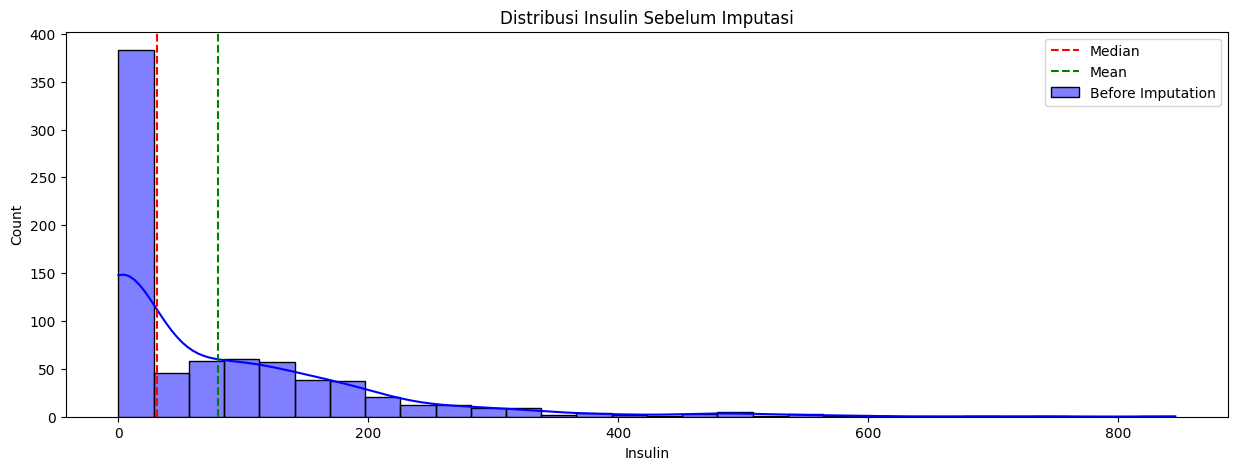

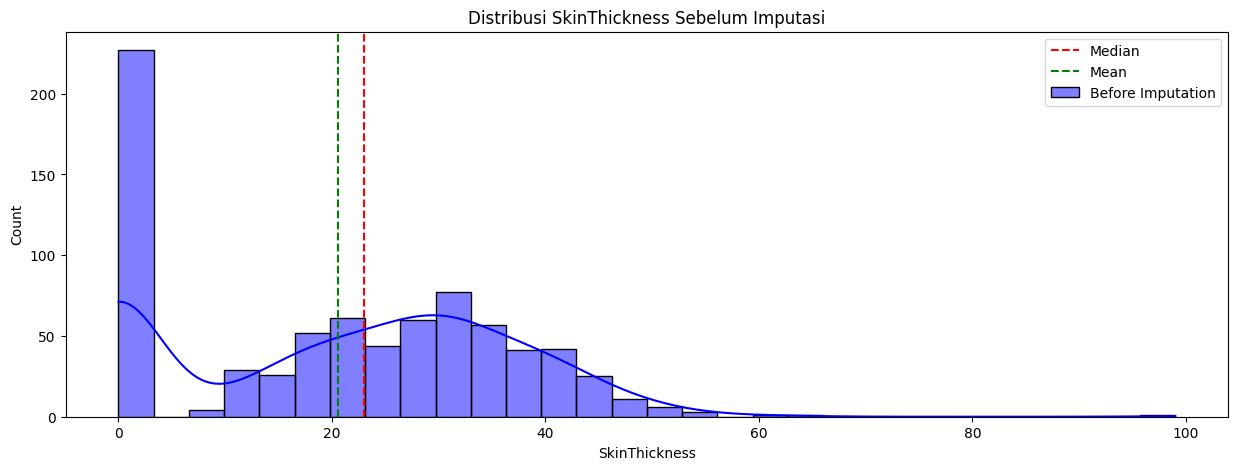

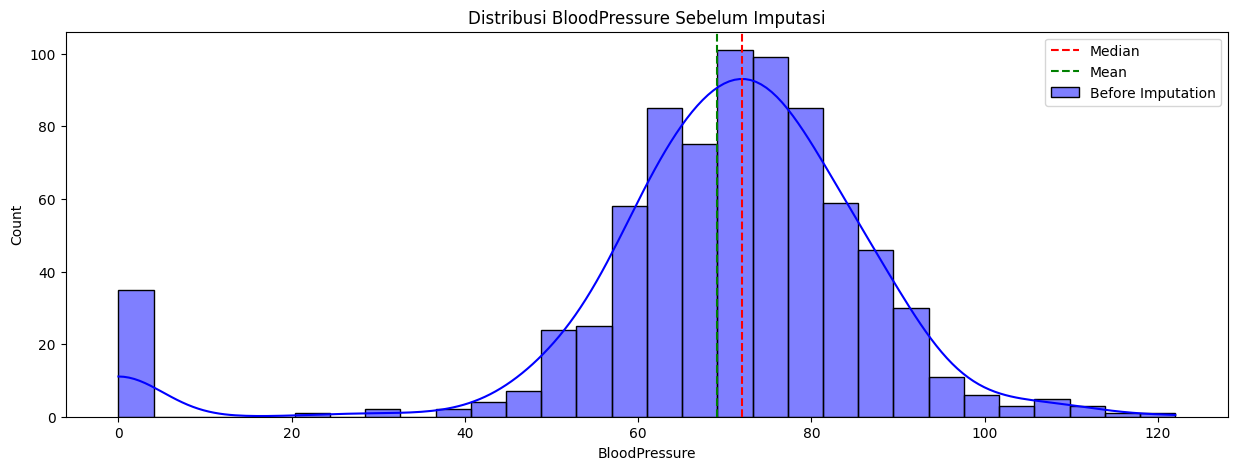

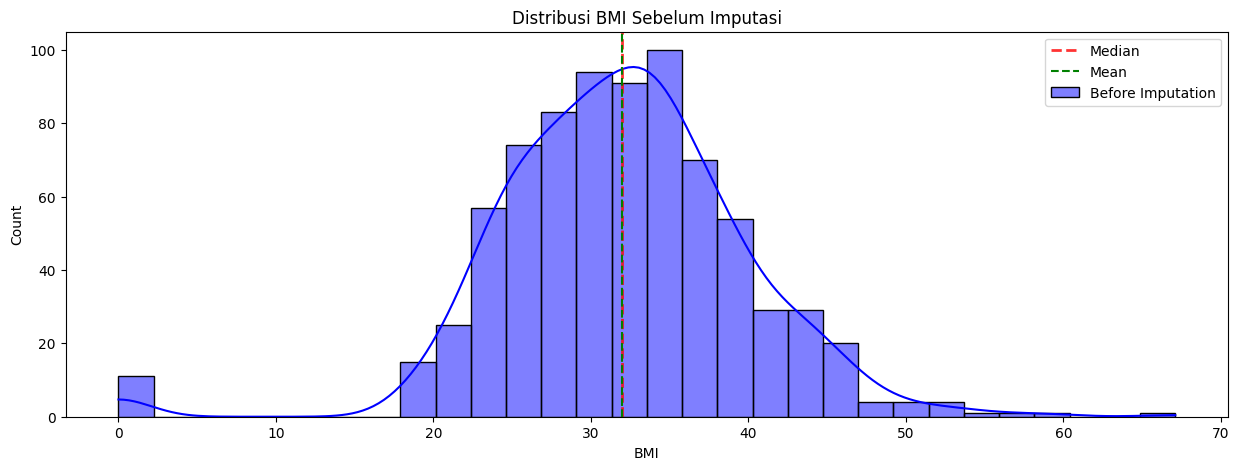

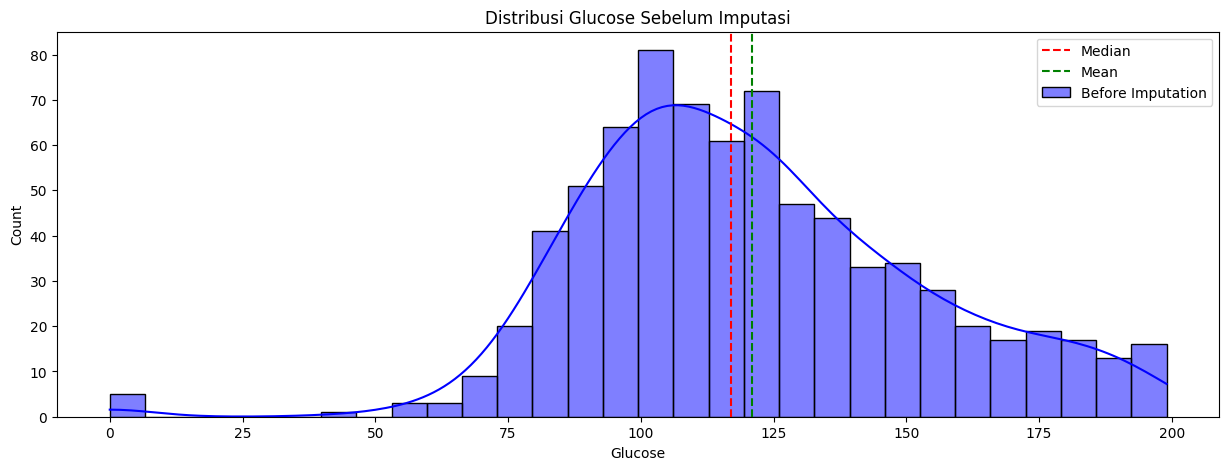

In [6]:

# Plot distribusi Insulin sebelum imputasi
plt.figure(figsize=(15,5))

sns.histplot(df['Insulin'], bins=30, kde=True, color='blue', label='Before Imputation')
plt.axvline(df['Insulin'].median(), color='red', linestyle='dashed', label='Median')
plt.axvline(df['Insulin'].mean(), color='green', linestyle='dashed', label='Mean')

plt.title("Distribusi Insulin Sebelum Imputasi")
plt.legend()
plt.show()


# Plot distribusi SkinThickness sebelum imputasi
plt.figure(figsize=(15,5))

sns.histplot(df['SkinThickness'], bins=30, kde=True, color='blue', label='Before Imputation')
plt.axvline(df['SkinThickness'].median(), color='red', linestyle='dashed', label='Median')
plt.axvline(df['SkinThickness'].mean(), color='green', linestyle='dashed', label='Mean')

plt.title("Distribusi SkinThickness Sebelum Imputasi")
plt.legend()
plt.show()


# Plot distribusi BloodPressure sebelum imputasi
plt.figure(figsize=(15,5))

sns.histplot(df['BloodPressure'], bins=30, kde=True, color='blue', label='Before Imputation')
plt.axvline(df['BloodPressure'].median(), color='red', linestyle='dashed', label='Median')
plt.axvline(df['BloodPressure'].mean(), color='green', linestyle='dashed', label='Mean')

plt.title("Distribusi BloodPressure Sebelum Imputasi")
plt.legend()
plt.show()

# Plot distribusi BMI sebelum imputasi
plt.figure(figsize=(15,5))

sns.histplot(df['BMI'], bins=30, kde=True, color='blue', label='Before Imputation')
plt.axvline(df['BMI'].median(),linewidth=2, alpha=0.8, color='red', linestyle='dashed', label='Median')
plt.axvline(df['BMI'].mean(), color='green', linestyle='dashed', label='Mean')

plt.title("Distribusi BMI Sebelum Imputasi")
plt.legend()
plt.show()


# Plot distribusi Glucose sebelum imputasi
plt.figure(figsize=(15,5))

sns.histplot(df['Glucose'], bins=30, kde=True, color='blue', label='Before Imputation')
plt.axvline(df['Glucose'].median(), color='red', linestyle='dashed', label='Median')
plt.axvline(df['Glucose'].mean(), color='green', linestyle='dashed', label='Mean')

plt.title("Distribusi Glucose Sebelum Imputasi")
plt.legend()
plt.show()


# Visualisasi Data sebelum Imputasi

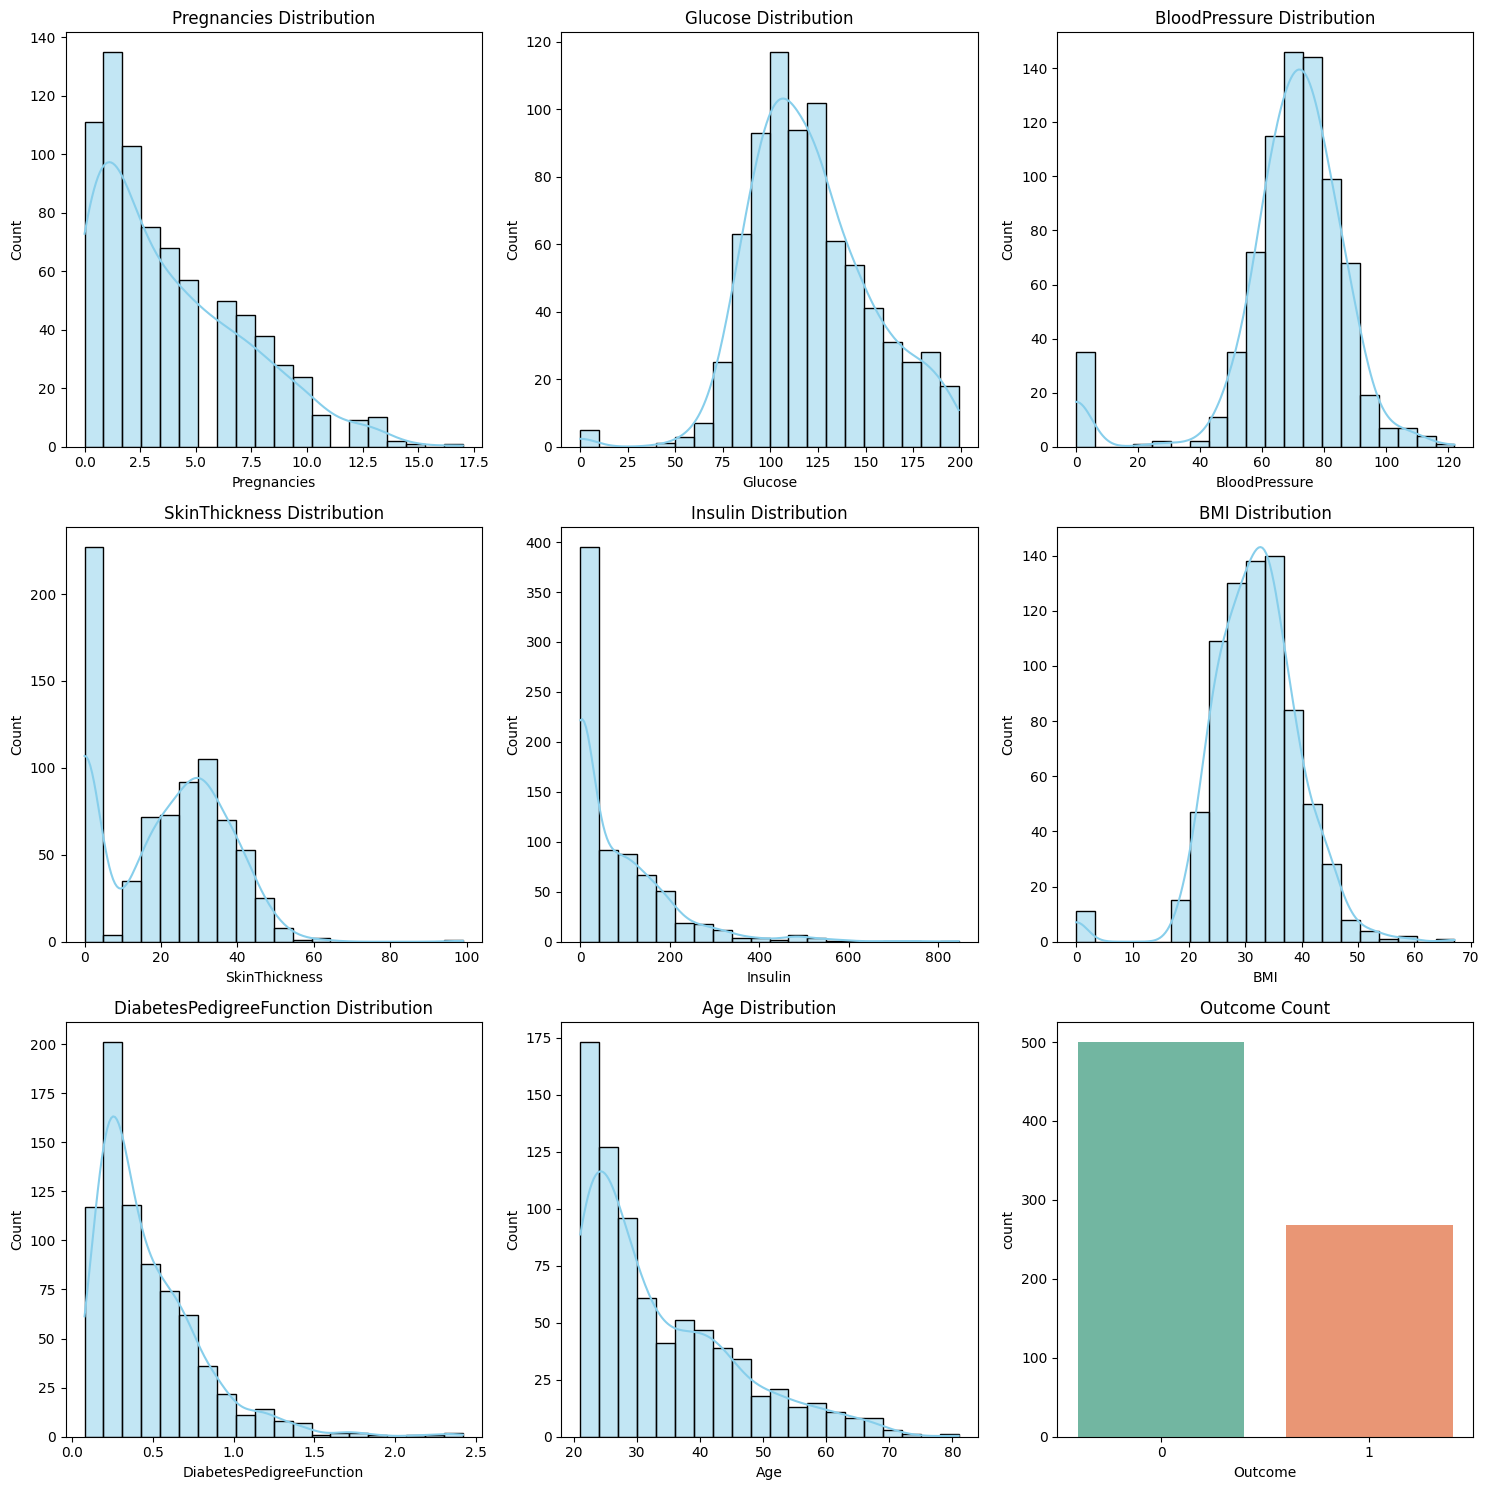

In [7]:

# Menyiapkan plot
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Menyusun fitur dan jenis visualisasi
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
plot_types = ['hist', 'hist', 'hist', 'hist', 'hist', 'hist', 'hist', 'hist', 'countplot']

# Membuat plot untuk setiap fitur
for i, feature in enumerate(features):
    ax = axes[i//3, i%3]  # Menentukan posisi plot
    if plot_types[i] == 'hist':
        sns.histplot(df[feature], kde=True, ax=ax, color='skyblue', bins=20)
        ax.set_title(f'{feature} Distribution')
    elif plot_types[i] == 'countplot':
        sns.countplot(x=df[feature], ax=ax, palette='Set2')
        ax.set_title(f'{feature} Count')

plt.tight_layout()
plt.show()

# Presentase nilai 0 pada tiap fitur

In [8]:
# Fitur yang akan diimputasi
target_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Ganti 0 dengan NaN agar dapat diimputasi
df[target_columns] = df[target_columns].replace(0, np.nan)

# Mengecek presentase missing value pada tiap kolom
missing_percent = df.replace(0, None).isnull().sum() / len(df) * 100
print(missing_percent)


Pregnancies                 14.453125
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                     65.104167
dtype: float64


# **Imputasi Missing Value**




# Imputasi dengan Metode KNN

In [9]:
from sklearn.impute import KNNImputer

# KNN Imputation menggunakan KNNImputer dari sklearn
knn_imputer = KNNImputer(n_neighbors=5)  # Menggunakan 5 tetangga terdekat

# Terapkan imputasi pada dataset dengan missing values
df_imputed_knn = knn_imputer.fit_transform(df)

# Konversi kembali hasil imputasi ke DataFrame untuk analisis lebih lanjut
df_imputed_knn = pd.DataFrame(df_imputed_knn, columns=df.columns)

df_imputed_knn

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,58.6,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,25.8,164.6,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.0,165.0,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,35.2,134.2,30.1,0.349,47.0,1.0


# Visualisasi setelah Imputasi dengan KNN

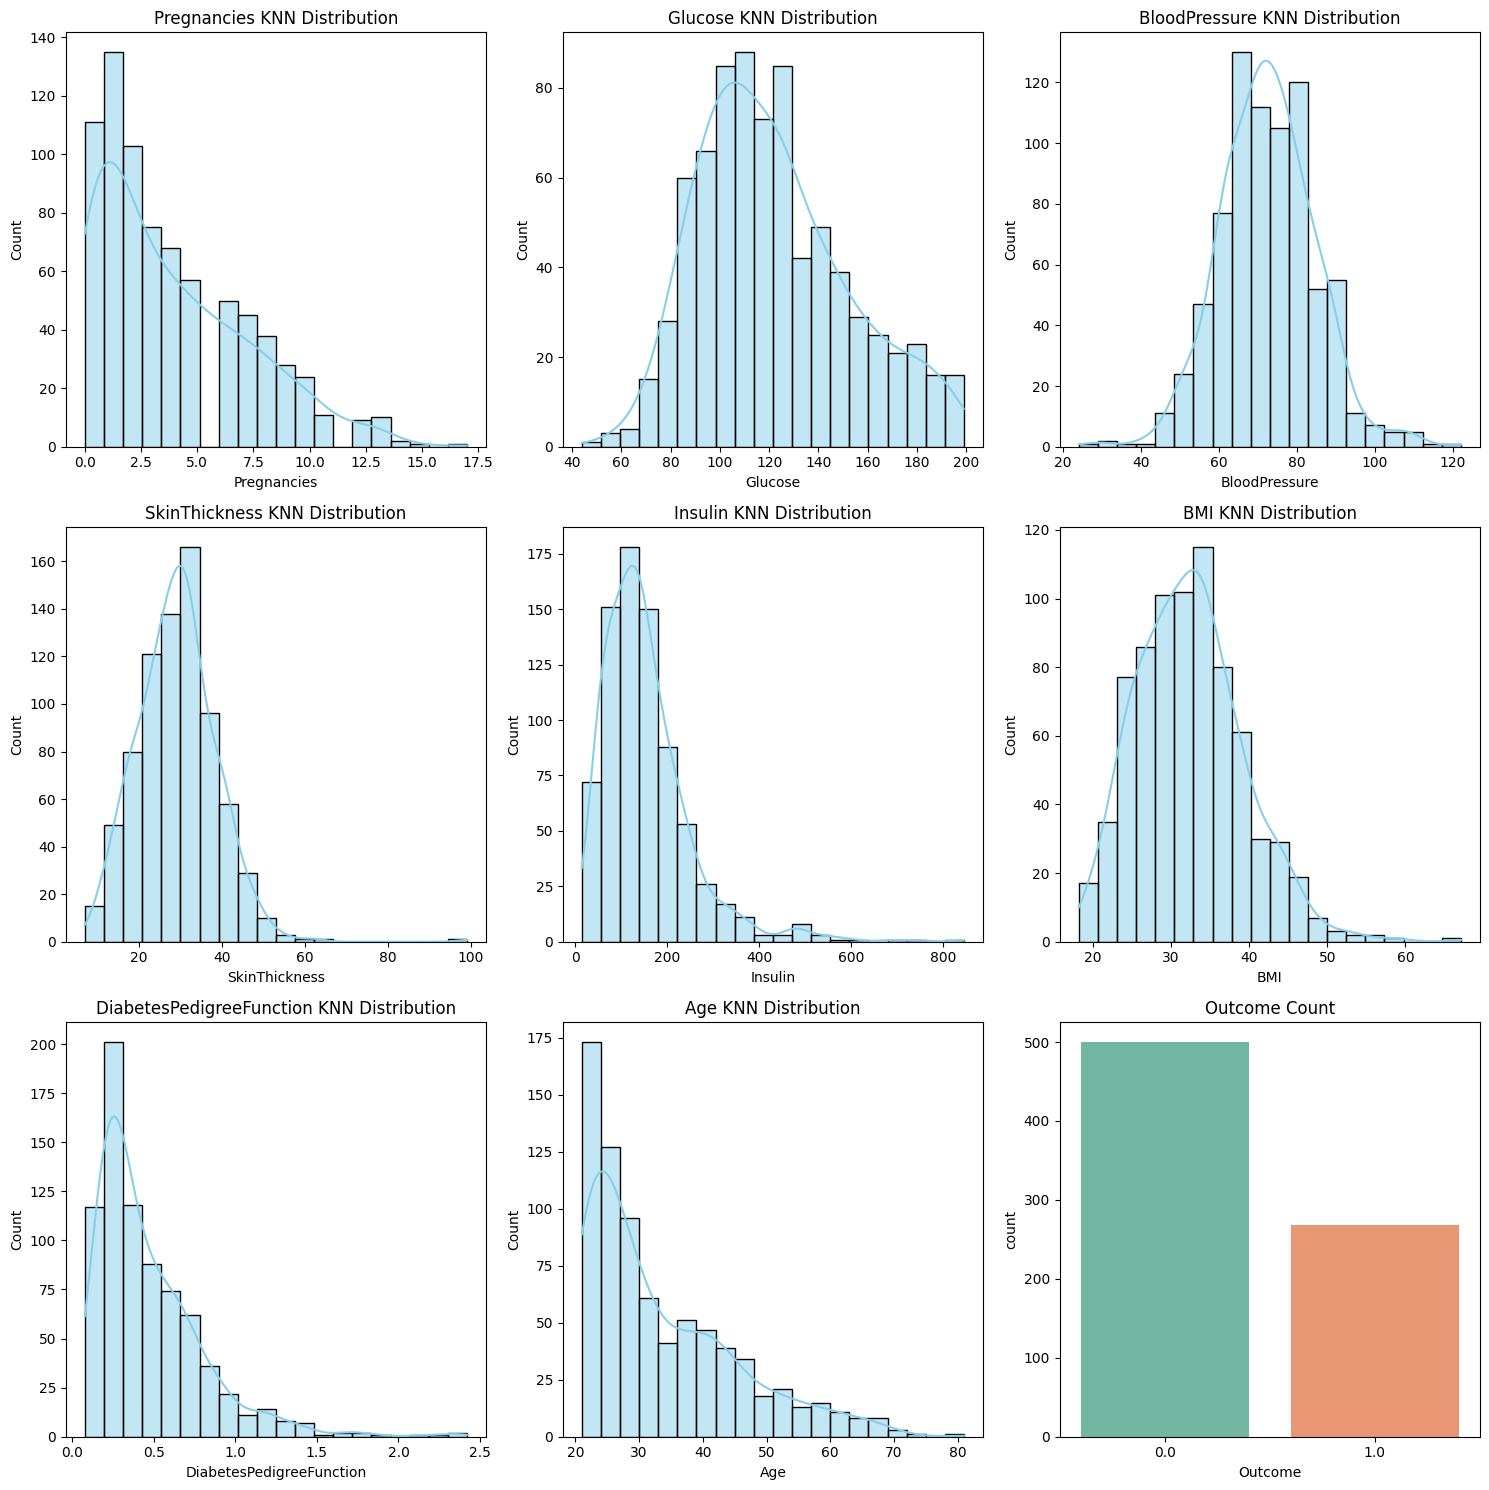

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,58.6,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,25.8,164.6,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.0,165.0,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,35.2,134.2,30.1,0.349,47.0,1.0


In [10]:

# Menyiapkan plot
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Menyusun fitur dan jenis visualisasi
features_knn= ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
plot_types = ['hist', 'hist', 'hist', 'hist', 'hist', 'hist', 'hist', 'hist', 'countplot']

# Membuat plot untuk setiap fitur
for i, feature in enumerate(features_knn):
    ax = axes[i//3, i%3]  # Menentukan posisi plot
    if plot_types[i] == 'hist':
        sns.histplot(df_imputed_knn[feature], kde=True, ax=ax, color='skyblue', bins=20)
        ax.set_title(f'{feature} KNN Distribution')
    elif plot_types[i] == 'countplot':
        sns.countplot(x=df_imputed_knn[feature], ax=ax, palette='Set2')
        ax.set_title(f'{feature} Count')

plt.tight_layout()
plt.show()
df_imputed_knn

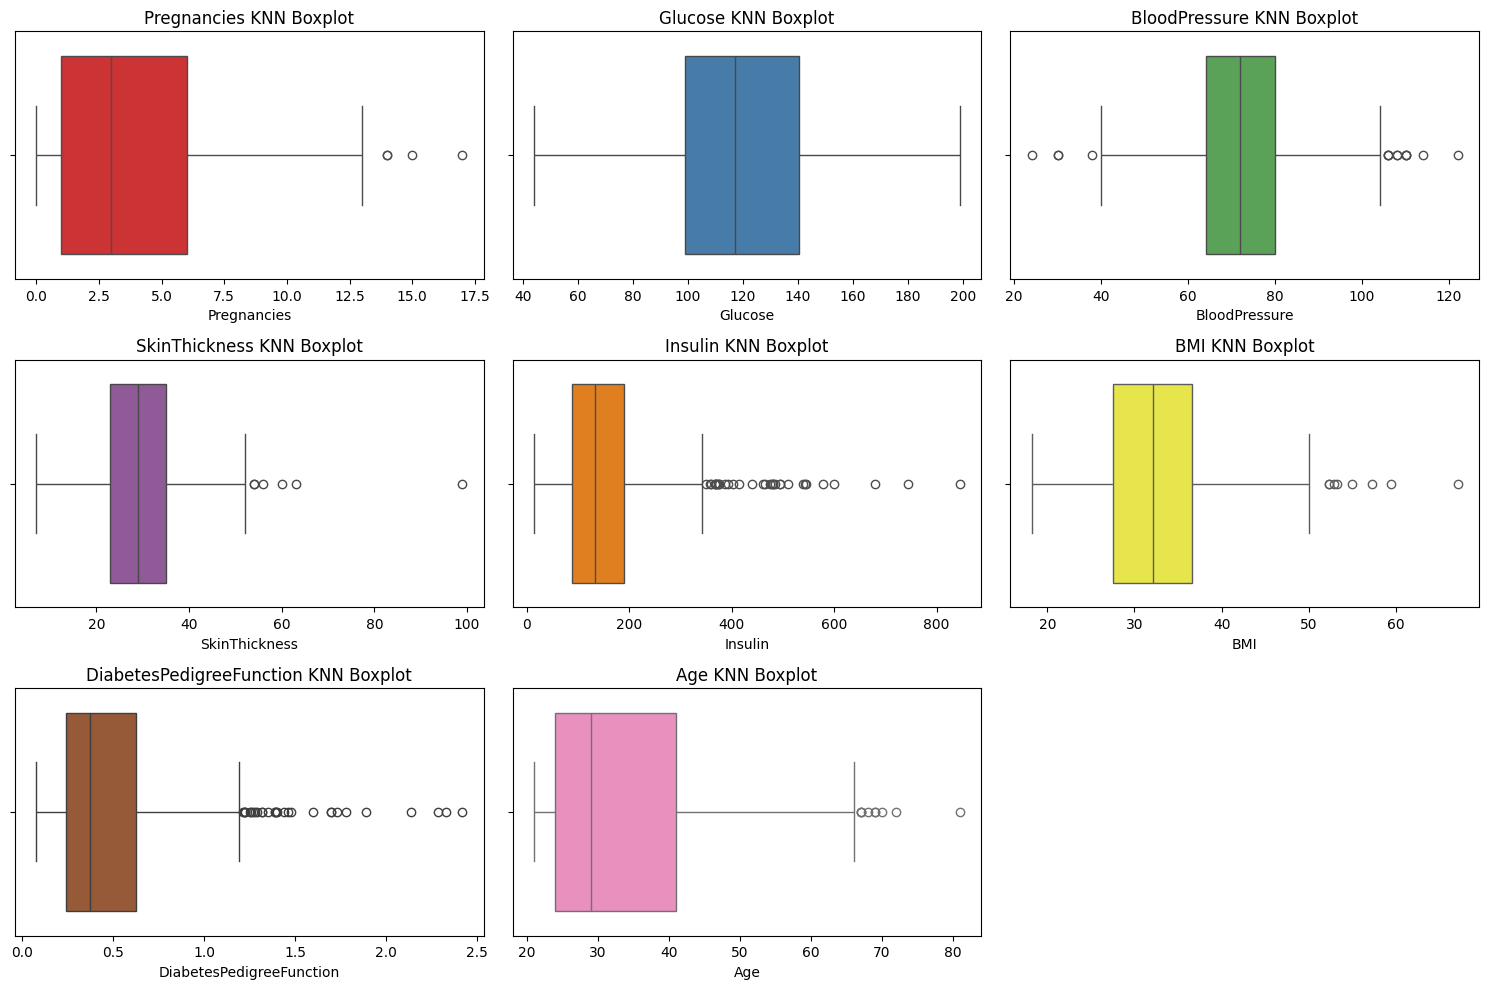

Pregnancies  4 outliers.
Glucose  0 outliers.
BloodPressure  14 outliers.
SkinThickness  6 outliers.
Insulin  33 outliers.
BMI  8 outliers.
DiabetesPedigreeFunction  29 outliers.
Age  9 outliers.


In [ ]:
# Visualisasi data Age dan Work Experience (Menggunakan Box Plot)

df_imputed_knn_kolom = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

color_palette = sns.color_palette("Set1", len(df_imputed_knn_kolom))
plt.figure(figsize = (15, 10))


# Menghitung IQR untuk mendeteksi outliers
Q1 = df_imputed_knn.quantile(0.25)
Q3 = df_imputed_knn.quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas untuk outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Membuat boxplot untuk setiap kolom yang telah dipilih
outliers_counts = []  # List untuk menghitung jumlah outliers

for i, column in enumerate(df_imputed_knn_kolom, 1):
    plt.subplot((len(df_imputed_knn_kolom)//3)+1, 3, i)  # Mengatur grid subplots
    sns.boxplot(data=df_imputed_knn, x=column, color=color_palette[i - 1])  # Membuat boxplot per kolom

    # Mendapatkan data untuk outliers
    outliers = df_imputed_knn[(df_imputed_knn[column] < lower_bound[column]) | (df_imputed_knn[column] > upper_bound[column])]

    # Menghitung jumlah outliers per kolom
    outliers_counts.append(len(outliers))

    plt.xlabel(column)
    plt.title(f'{column} KNN Boxplot')

# Menampilkan jumlah outliers dalam kalimat di bawah boxplot
plt.tight_layout()
plt.show()

# Menampilkan jumlah outliers dalam kalimat
for i, count in enumerate(outliers_counts, 0):
    print(f'{df_imputed_knn_kolom[i]}  {count} outliers.')

# Imputasi dengan Metode RF

In [16]:
from sklearn.ensemble import RandomForestRegressor

# Salin dataset untuk imputasi
df_rf = df.copy()

# Inisialisasi RandomForestRegressor untuk imputasi
rf_imputer = RandomForestRegressor(n_estimators=100, random_state=0)

# Mengimputasi nilai yang hilang pada setiap kolom secara terpisah
for column in df_rf.columns:
    if df_rf[column].isnull().sum() > 0:  # Hanya kolom yang memiliki missing values
        # Pisahkan data menjadi fitur dan target
        train_data = df_rf[df_rf[column].notnull()]
        X_train = train_data.drop(columns=[column])  # Fitur (selain kolom yang hilang)
        y_train = train_data[column]  # Target (kolom yang hilang)

        # Latih model Random Forest untuk mengimputasi nilai yang hilang
        rf_imputer.fit(X_train, y_train)

        # Prediksi nilai yang hilang
        missing_data = df_rf[df_rf[column].isnull()]
        X_missing = missing_data.drop(columns=[column])
        df_rf.loc[df_rf[column].isnull(), column] = rf_imputer.predict(X_missing)


df_rf


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00,187.27,33.6,0.627,50,1
1,1,85.0,66.0,29.00,55.29,26.6,0.351,31,0
2,8,183.0,64.0,18.82,250.81,23.3,0.672,32,1
3,1,89.0,66.0,23.00,94.00,28.1,0.167,21,0
4,0,137.0,40.0,35.00,168.00,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00,180.00,32.9,0.171,63,0
764,2,122.0,70.0,27.00,193.68,36.8,0.340,27,0
765,5,121.0,72.0,23.00,112.00,26.2,0.245,30,0
766,1,126.0,60.0,26.76,165.31,30.1,0.349,47,1


# Visualisasi setelah imputasi dengan RF

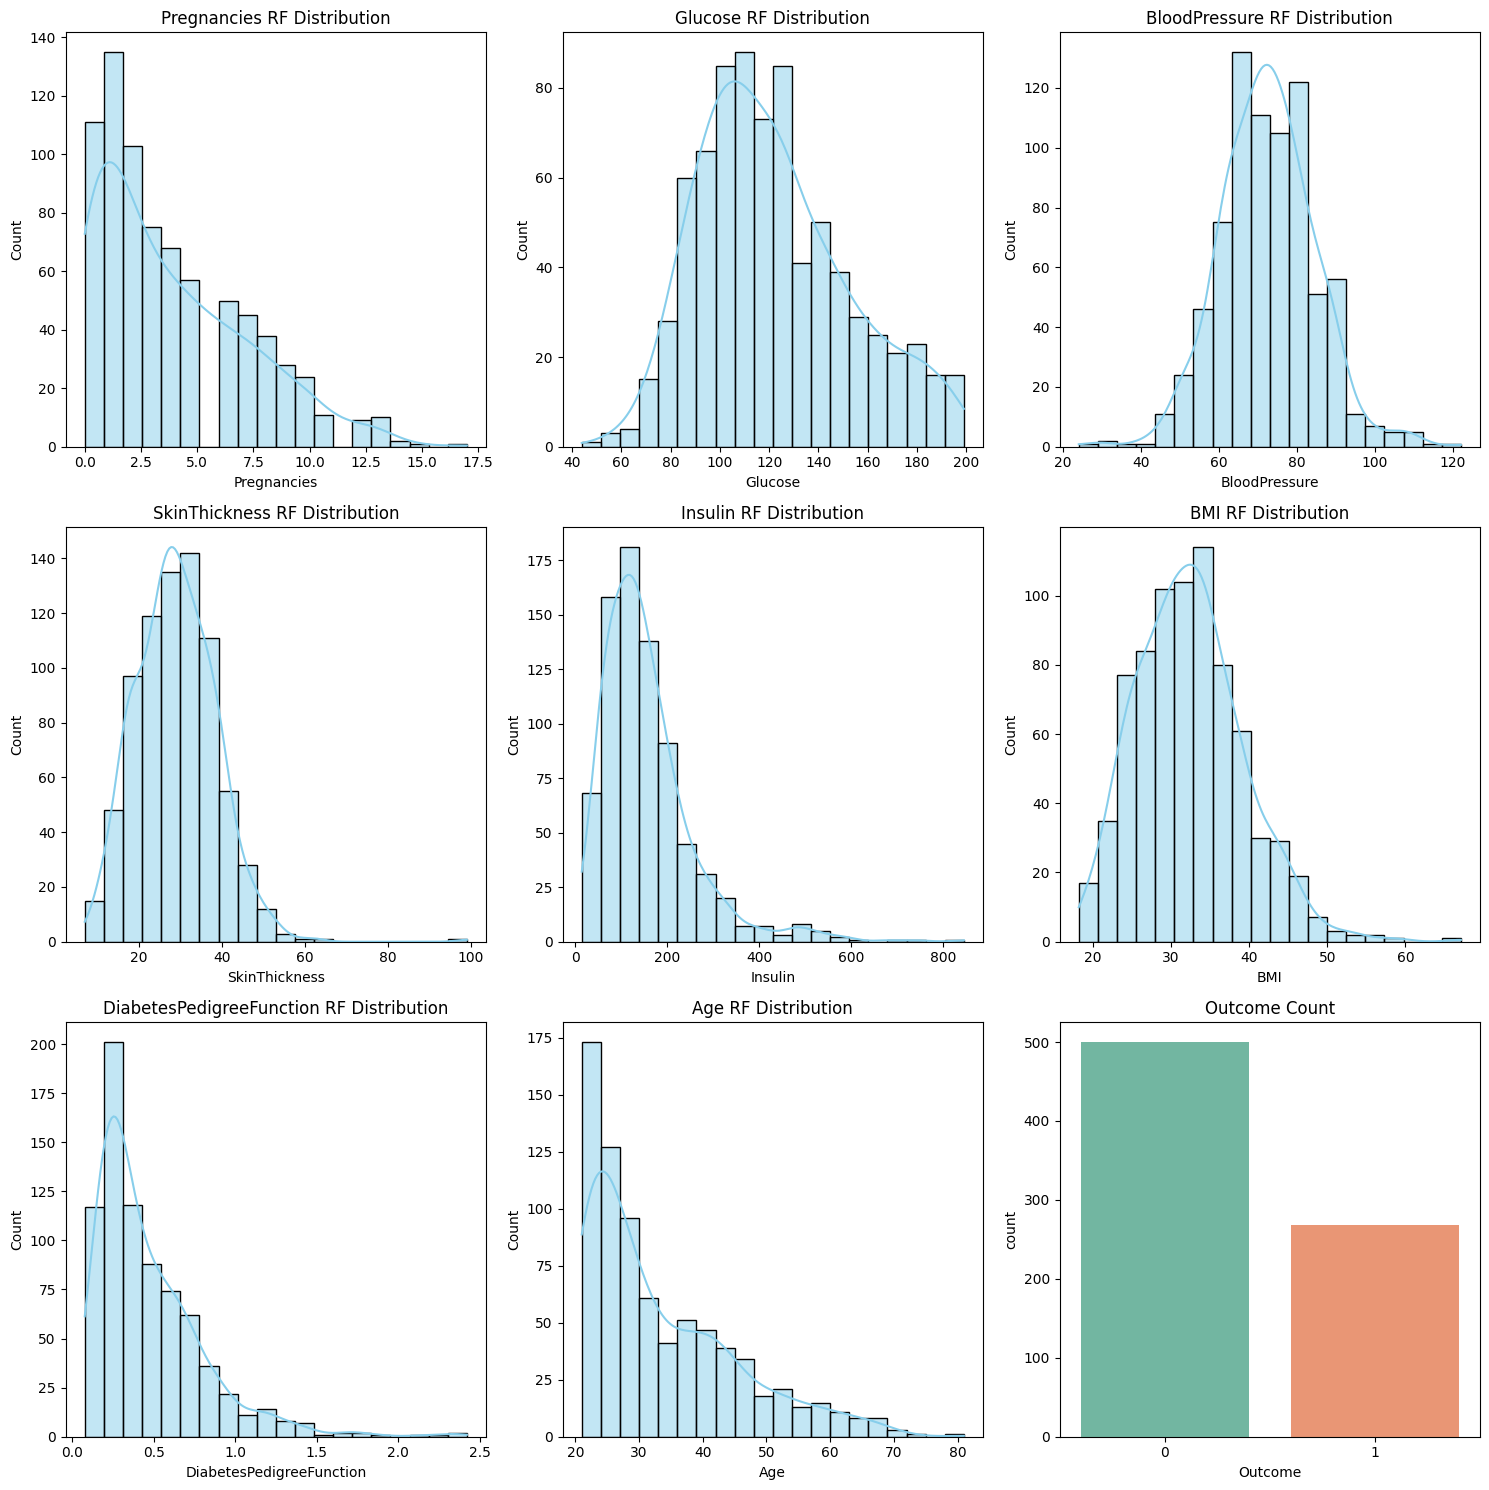

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00,187.27,33.6,0.627,50,1
1,1,85.0,66.0,29.00,55.29,26.6,0.351,31,0
2,8,183.0,64.0,18.82,250.81,23.3,0.672,32,1
3,1,89.0,66.0,23.00,94.00,28.1,0.167,21,0
4,0,137.0,40.0,35.00,168.00,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00,180.00,32.9,0.171,63,0
764,2,122.0,70.0,27.00,193.68,36.8,0.340,27,0
765,5,121.0,72.0,23.00,112.00,26.2,0.245,30,0
766,1,126.0,60.0,26.76,165.31,30.1,0.349,47,1


In [15]:

# Menyiapkan plot
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Menyusun fitur dan jenis visualisasi
features_rf= ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
plot_types = ['hist', 'hist', 'hist', 'hist', 'hist', 'hist', 'hist', 'hist', 'countplot']

# Membuat plot untuk setiap fitur
for i, feature in enumerate(features_rf):
    ax = axes[i//3, i%3]  # Menentukan posisi plot
    if plot_types[i] == 'hist':
        sns.histplot(df_rf[feature], kde=True, ax=ax, color='skyblue', bins=20)
        ax.set_title(f'{feature} RF Distribution')
    elif plot_types[i] == 'countplot':
        sns.countplot(x=df_rf[feature], ax=ax, palette='Set2')
        ax.set_title(f'{feature} Count')

plt.tight_layout()
plt.show()
df_rf

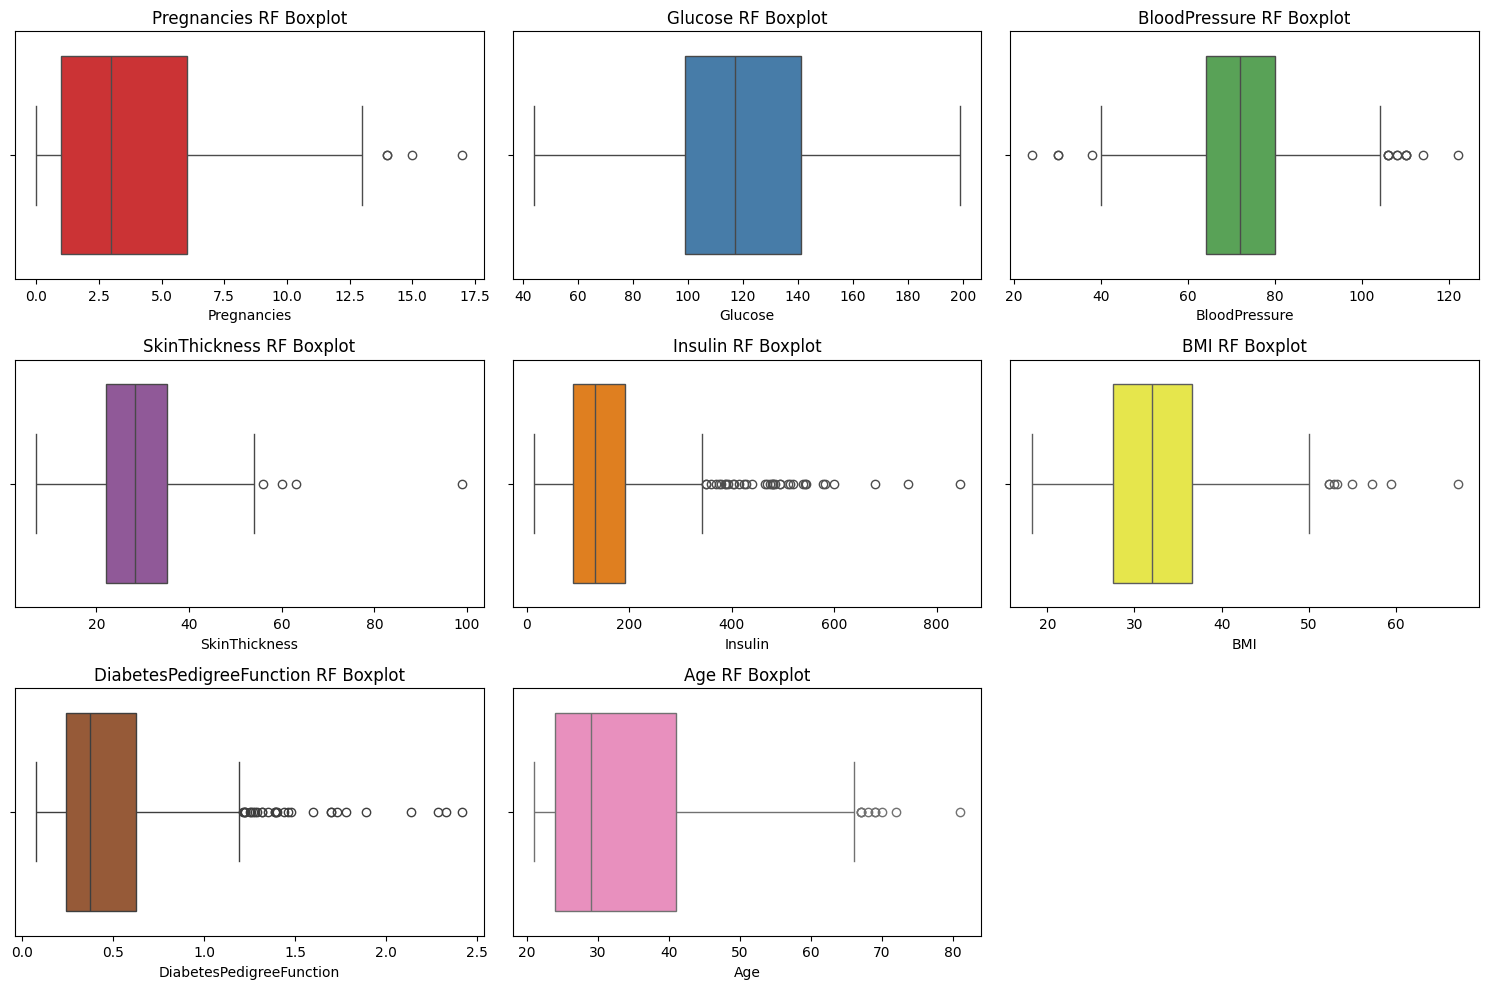

Pregnancies  4 outliers.
Glucose  0 outliers.
BloodPressure  14 outliers.
SkinThickness  4 outliers.
Insulin  36 outliers.
BMI  8 outliers.
DiabetesPedigreeFunction  29 outliers.
Age  9 outliers.


In [18]:
# Sekarang kita coba visualisasi data Age dan Work Experience (Menggunakan Box Plot)

df_rf_kolom = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

color_palette = sns.color_palette("Set1", len(df_rf_kolom))
plt.figure(figsize = (15, 10))

# Menghitung IQR untuk mendeteksi outliers
Q1 = df_rf.quantile(0.25)
Q3 = df_rf.quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas untuk outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Membuat boxplot untuk setiap kolom yang telah dipilih
outliers_counts = []  # List untuk menghitung jumlah outliers

for i, column in enumerate(df_rf_kolom, 1):
    plt.subplot((len(df_rf_kolom)//3)+1, 3, i)  # Mengatur grid subplots
    sns.boxplot(data=df_rf, x=column, color=color_palette[i - 1])  # Membuat boxplot per kolom

    # Mendapatkan data untuk outliers
    outliers = df_rf[(df_rf[column] < lower_bound[column]) | (df_rf[column] > upper_bound[column])]

    # Menghitung jumlah outliers per kolom
    outliers_counts.append(len(outliers))

    plt.xlabel(column)
    plt.title(f'{column} RF Boxplot')

# Menampilkan jumlah outliers dalam kalimat di bawah boxplot
plt.tight_layout()
plt.show()

# Menampilkan jumlah outliers dalam kalimat
for i, count in enumerate(outliers_counts, 0):
    print(f'{df_rf_kolom[i]}  {count} outliers.')


# Imputasi dengan Beberapa Metode sekaligus

In [19]:
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor


# Salin dataset untuk imputasi
imputed_df = df.copy()

# Imputasi Median untuk fitur dengan missing <10%
for col in ['Glucose', 'BloodPressure', 'BMI']:
    imputed_df[col].fillna(imputed_df[col].median(), inplace=True)

# **2. Random Forest untuk imputasi SkinThickness**
skin_complete = imputed_df[imputed_df['SkinThickness'].notnull()]
skin_missing = imputed_df[imputed_df['SkinThickness'].isnull()]

if not skin_missing.empty:
    rf_skin = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_skin.fit(skin_complete[['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age']],
                skin_complete['SkinThickness'])

    skin_pred = rf_skin.predict(skin_missing[['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age']])
    imputed_df.loc[imputed_df['SkinThickness'].isnull(), 'SkinThickness'] = skin_pred

# **3. Random Forest untuk imputasi Insulin (setelah SkinThickness diisi)**
insulin_complete = imputed_df[imputed_df['Insulin'].notnull()]
insulin_missing = imputed_df[imputed_df['Insulin'].isnull()]

if not insulin_missing.empty:
    rf_insulin = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_insulin.fit(insulin_complete[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age']],
                   insulin_complete['Insulin'])

    insulin_pred = rf_insulin.predict(insulin_missing[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age']])
    imputed_df.loc[imputed_df['Insulin'].isnull(), 'Insulin'] = insulin_pred

# **4. Cek hasil akhir**
print("\nMissing values after imputation:\n", imputed_df.isnull().sum())
imputed_df



Missing values after imputation:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00,171.69,33.6,0.627,50,1
1,1,85.0,66.0,29.00,50.45,26.6,0.351,31,0
2,8,183.0,64.0,19.66,256.55,23.3,0.672,32,1
3,1,89.0,66.0,23.00,94.00,28.1,0.167,21,0
4,0,137.0,40.0,35.00,168.00,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00,180.00,32.9,0.171,63,0
764,2,122.0,70.0,27.00,185.97,36.8,0.340,27,0
765,5,121.0,72.0,23.00,112.00,26.2,0.245,30,0
766,1,126.0,60.0,26.13,139.73,30.1,0.349,47,1


# Visualisasi setelah imputasi pada fitur Glucose, Insulin, SkinThickness, BloodPresure, dan BMI

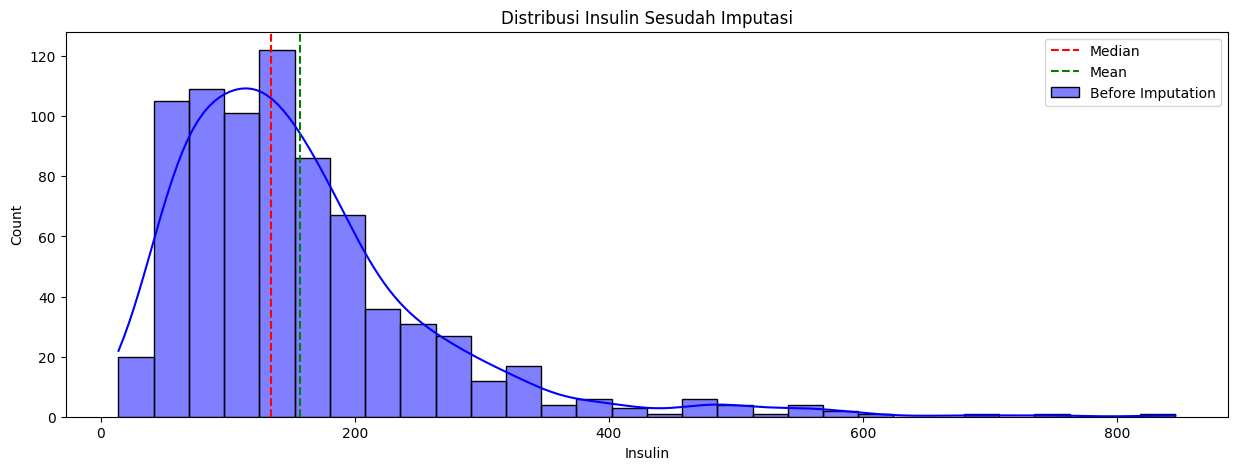

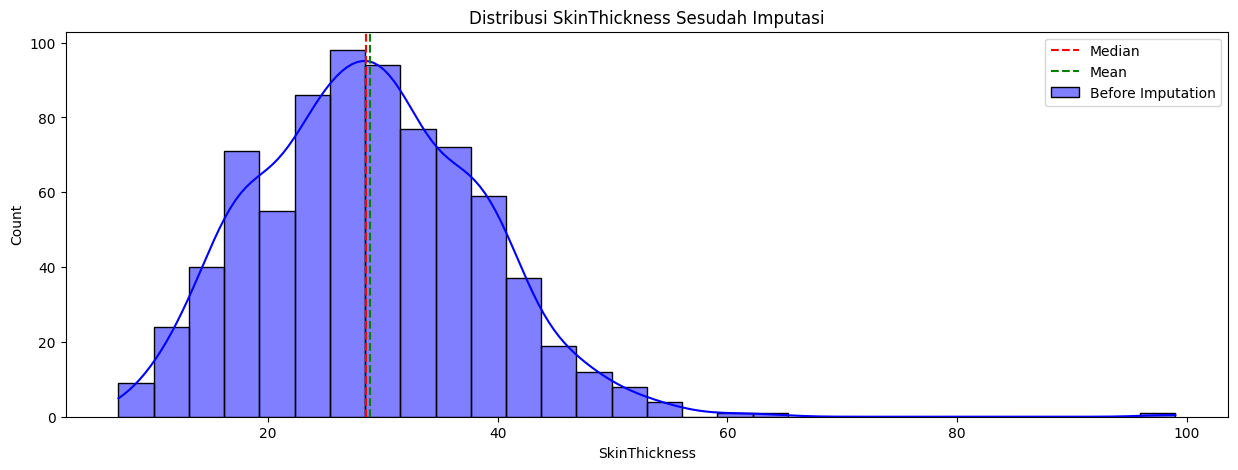

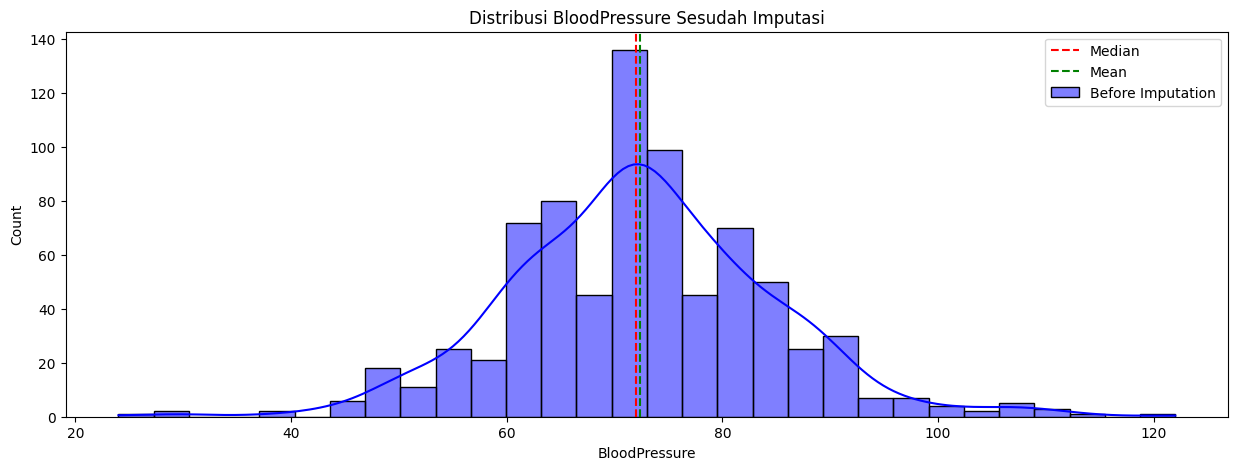

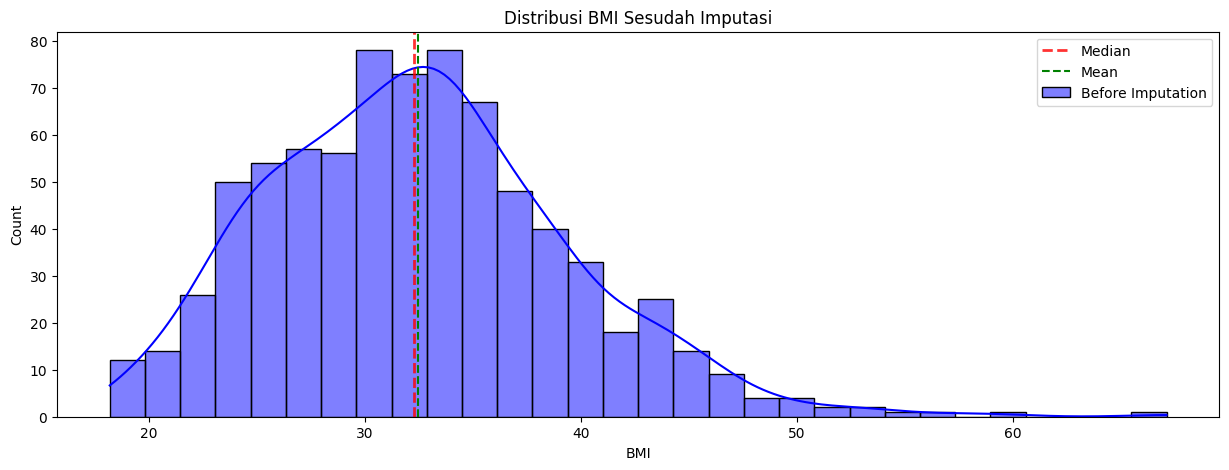

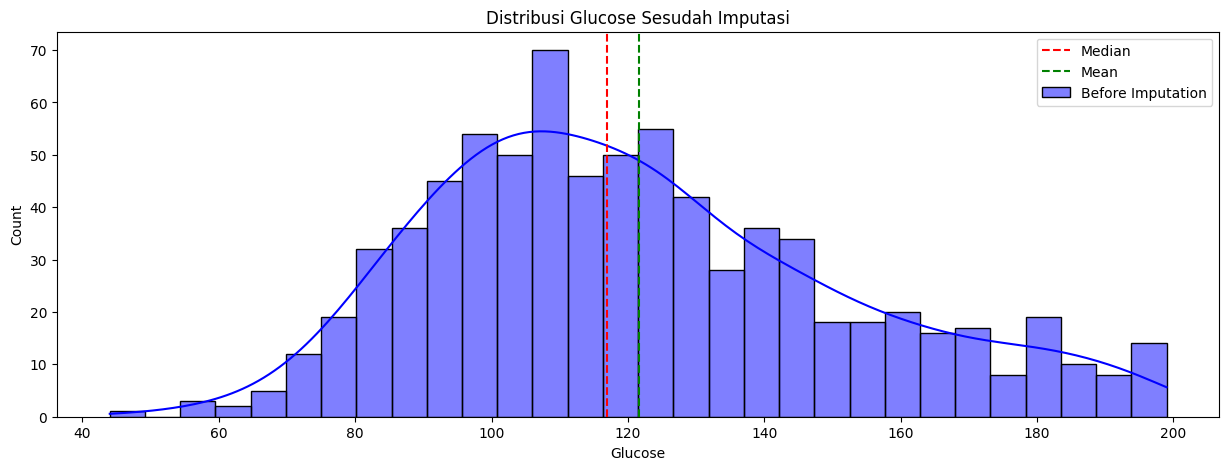

In [20]:

# Plot distribusi Insulin sesudah imputasi
plt.figure(figsize=(15,5))

sns.histplot(imputed_df['Insulin'], bins=30, kde=True, color='blue', label='Before Imputation')
plt.axvline(imputed_df['Insulin'].median(), color='red', linestyle='dashed', label='Median')
plt.axvline(imputed_df['Insulin'].mean(), color='green', linestyle='dashed', label='Mean')

plt.title("Distribusi Insulin Sesudah Imputasi")
plt.legend()
plt.show()


# Plot distribusi SkinThickness sesudah imputasi
plt.figure(figsize=(15,5))

sns.histplot(imputed_df['SkinThickness'], bins=30, kde=True, color='blue', label='Before Imputation')
plt.axvline(imputed_df['SkinThickness'].median(), color='red', linestyle='dashed', label='Median')
plt.axvline(imputed_df['SkinThickness'].mean(), color='green', linestyle='dashed', label='Mean')

plt.title("Distribusi SkinThickness Sesudah Imputasi")
plt.legend()
plt.show()


# Plot distribusi BloodPressure sesudah imputasi
plt.figure(figsize=(15,5))

sns.histplot(imputed_df['BloodPressure'], bins=30, kde=True, color='blue', label='Before Imputation')
plt.axvline(imputed_df['BloodPressure'].median(), color='red', linestyle='dashed', label='Median')
plt.axvline(imputed_df['BloodPressure'].mean(), color='green', linestyle='dashed', label='Mean')

plt.title("Distribusi BloodPressure Sesudah Imputasi")
plt.legend()
plt.show()

# Plot distribusi BMI sesudah imputasi
plt.figure(figsize=(15,5))

sns.histplot(imputed_df['BMI'], bins=30, kde=True, color='blue', label='Before Imputation')
plt.axvline(imputed_df['BMI'].median(),linewidth=2, alpha=0.8, color='red', linestyle='dashed', label='Median')
plt.axvline(imputed_df['BMI'].mean(), color='green', linestyle='dashed', label='Mean')

plt.title("Distribusi BMI Sesudah Imputasi")
plt.legend()
plt.show()


# Plot distribusi Glucose sesudah imputasi
plt.figure(figsize=(15,5))

sns.histplot(imputed_df['Glucose'], bins=30, kde=True, color='blue', label='Before Imputation')
plt.axvline(imputed_df['Glucose'].median(), color='red', linestyle='dashed', label='Median')
plt.axvline(imputed_df['Glucose'].mean(), color='green', linestyle='dashed', label='Mean')

plt.title("Distribusi Glucose Sesudah Imputasi")
plt.legend()
plt.show()


# Visualisasi setelah imputasi dengan beberapa metode

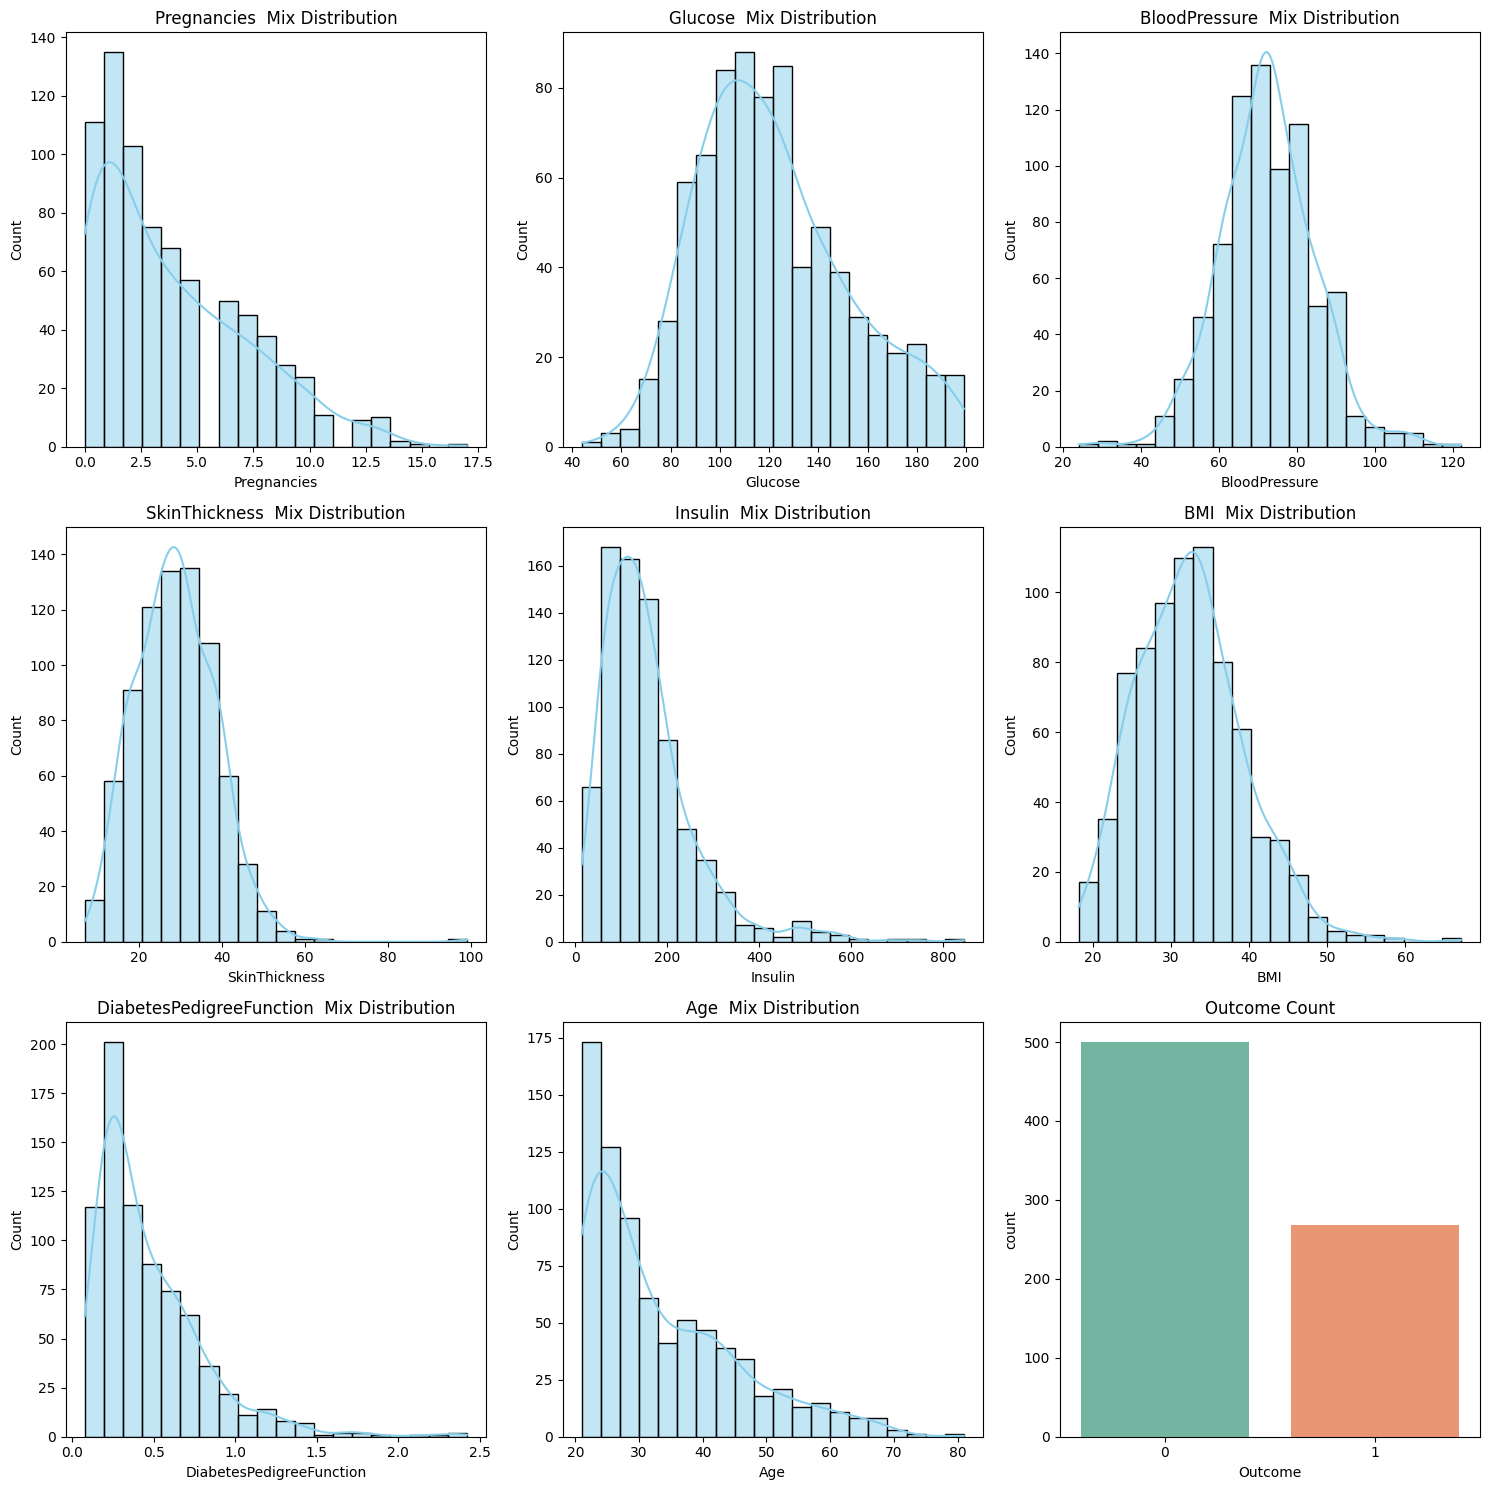

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00,171.69,33.6,0.627,50,1
1,1,85.0,66.0,29.00,50.45,26.6,0.351,31,0
2,8,183.0,64.0,19.66,256.55,23.3,0.672,32,1
3,1,89.0,66.0,23.00,94.00,28.1,0.167,21,0
4,0,137.0,40.0,35.00,168.00,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00,180.00,32.9,0.171,63,0
764,2,122.0,70.0,27.00,185.97,36.8,0.340,27,0
765,5,121.0,72.0,23.00,112.00,26.2,0.245,30,0
766,1,126.0,60.0,26.13,139.73,30.1,0.349,47,1


In [39]:

# Menyiapkan plot
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Menyusun fitur dan jenis visualisasi
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
plot_types = ['hist', 'hist', 'hist', 'hist', 'hist', 'hist', 'hist', 'hist', 'countplot']

# Membuat plot untuk setiap fitur
for i, feature in enumerate(features):
    ax = axes[i//3, i%3]  # Menentukan posisi plot
    if plot_types[i] == 'hist':
        sns.histplot(imputed_df[feature], kde=True, ax=ax, color='skyblue', bins=20)
        ax.set_title(f'{feature}  Mix Distribution')
    elif plot_types[i] == 'countplot':
        sns.countplot(x=df[feature], ax=ax, palette='Set2')
        ax.set_title(f'{feature} Count')

plt.tight_layout()
plt.show()
imputed_df

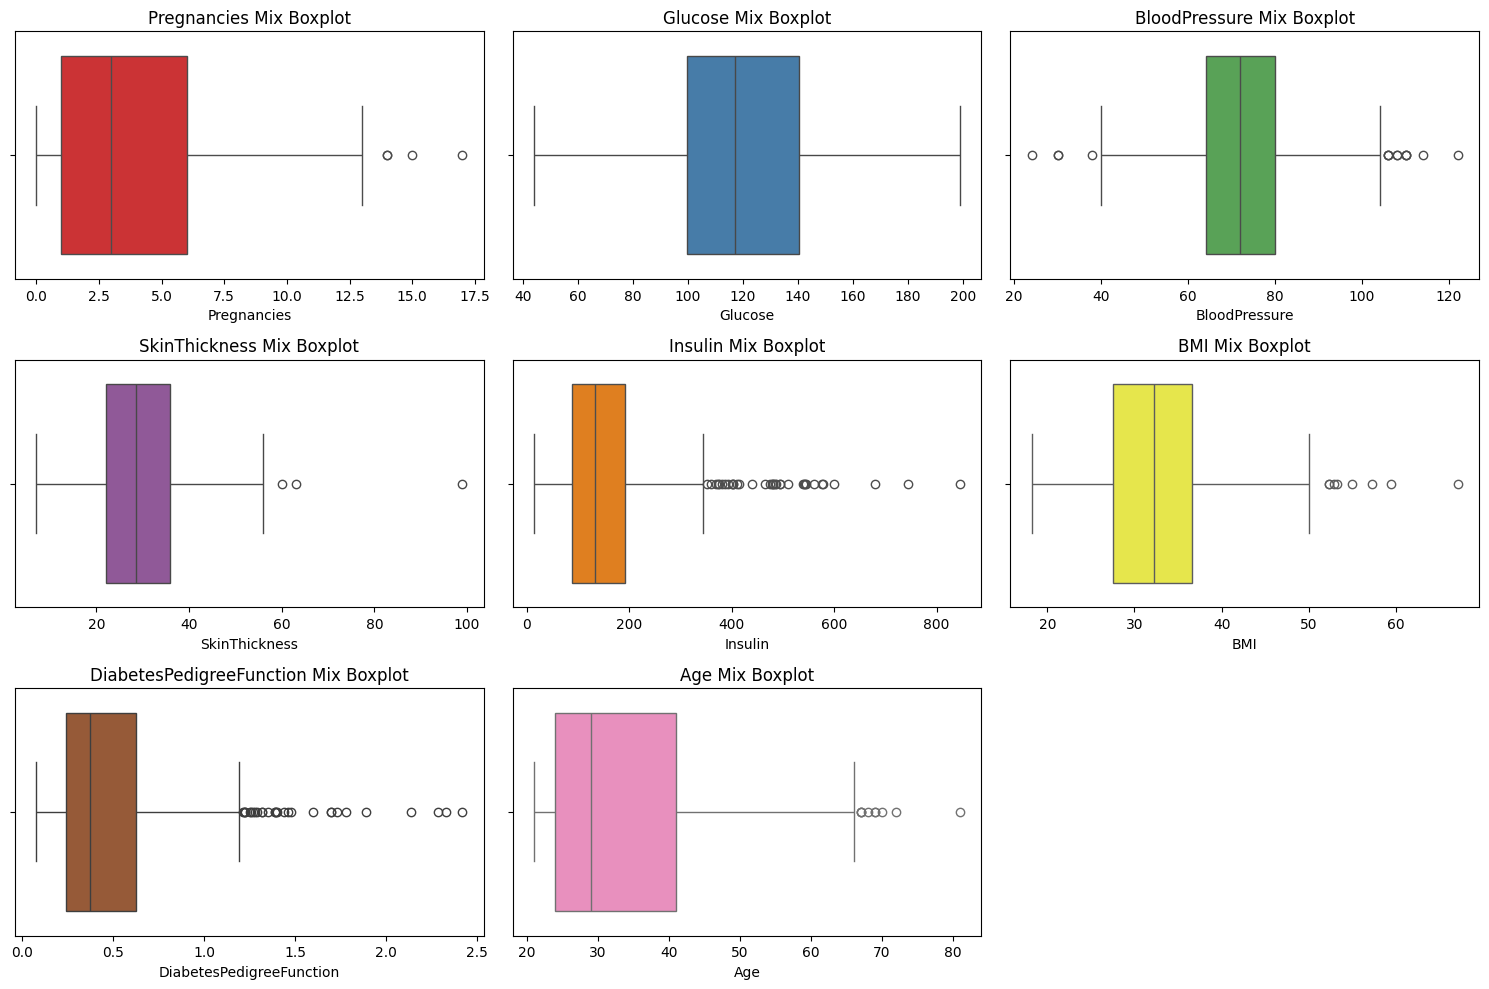

Pregnancies  4 outliers.
Glucose  0 outliers.
BloodPressure  14 outliers.
SkinThickness  3 outliers.
Insulin  35 outliers.
BMI  8 outliers.
DiabetesPedigreeFunction  29 outliers.
Age  9 outliers.


In [38]:
# Visualisasi data Age dan Work Experience (Menggunakan Box Plot)

imputed_df_kolom = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

color_palette = sns.color_palette("Set1", len(imputed_df_kolom))
plt.figure(figsize = (15, 10))


# Menghitung IQR untuk mendeteksi outliers
Q1 = imputed_df.quantile(0.25)
Q3 = imputed_df.quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas untuk outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Membuat boxplot untuk setiap kolom yang telah dipilih
outliers_counts = []  # List untuk menghitung jumlah outliers

for i, column in enumerate(imputed_df_kolom, 1):
    plt.subplot((len(imputed_df_kolom)//3)+1, 3, i)  # Mengatur grid subplots
    sns.boxplot(data=imputed_df, x=column, color=color_palette[i - 1])  # Membuat boxplot per kolom

    # Mendapatkan data untuk outliers
    outliers = imputed_df[(imputed_df[column] < lower_bound[column]) | (imputed_df[column] > upper_bound[column])]

    # Menghitung jumlah outliers per kolom
    outliers_counts.append(len(outliers))

    plt.xlabel(column)
    plt.title(f'{column} Mix Boxplot')

# Menampilkan jumlah outliers dalam kalimat di bawah boxplot
plt.tight_layout()
plt.show()

# Menampilkan jumlah outliers dalam kalimat
for i, count in enumerate(outliers_counts, 0):
    print(f'{imputed_df_kolom[i]}  {count} outliers.')

# **Handling Outlier**

# Deteksi outlier dengan Z-Score

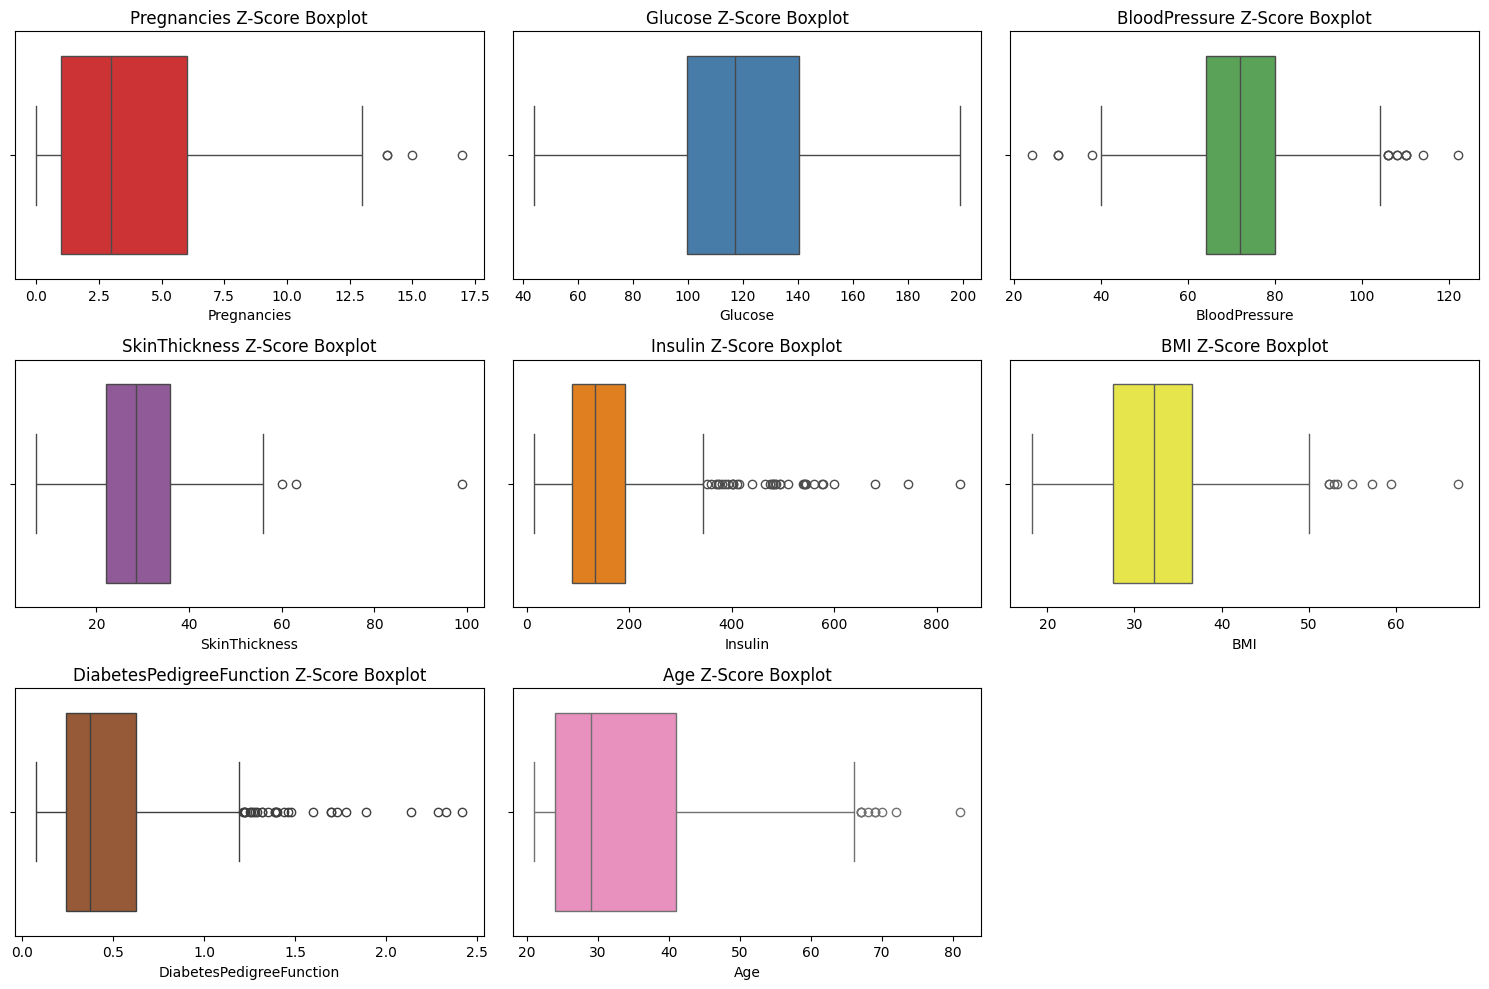

Pregnancies: 4 outliers.
Glucose: 0 outliers.
BloodPressure: 8 outliers.
SkinThickness: 3 outliers.
Insulin: 20 outliers.
BMI: 5 outliers.
DiabetesPedigreeFunction: 11 outliers.
Age: 5 outliers.


In [40]:
from scipy.stats import zscore

# Daftar kolom yang ingin divisualisasikan
kolom_2 = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
           'BMI', 'DiabetesPedigreeFunction', 'Age']

# Membuat palet warna
color_palette = sns.color_palette("Set1", len(kolom_2))

plt.figure(figsize=(15, 10))

# Menghitung Z-score untuk mendeteksi outliers
z_scores = imputed_df[kolom_2].apply(zscore)

# Menentukan batas outlier (Z-score threshold biasanya 3)
threshold = 3
outliers_counts = []  # List untuk menyimpan jumlah outlier per kolom

# Loop untuk membuat boxplot dan menghitung outlier
for i, column in enumerate(kolom_2, 1):
    plt.subplot((len(kolom_2) + 2) // 3, 3, i)  # Grid subplot otomatis

    # Boxplot per kolom
    sns.boxplot(data=imputed_df, x=column, color=color_palette[i - 1])

    # Menentukan data outliers berdasarkan Z-score
    outliers = imputed_df[np.abs(z_scores[column]) > threshold]
    outliers_counts.append(len(outliers))  # Simpan jumlah outlier

    plt.xlabel(column)
    plt.title(f'{column} Z-Score Boxplot')

# Menyesuaikan layout agar tidak saling tumpang tindih
plt.tight_layout()
plt.show()

# Menampilkan jumlah outliers dalam bentuk teks
for col, count in zip(kolom_2, outliers_counts):
    print(f'{col}: {count} outliers.')

# Deteksi outlier dengan IQR

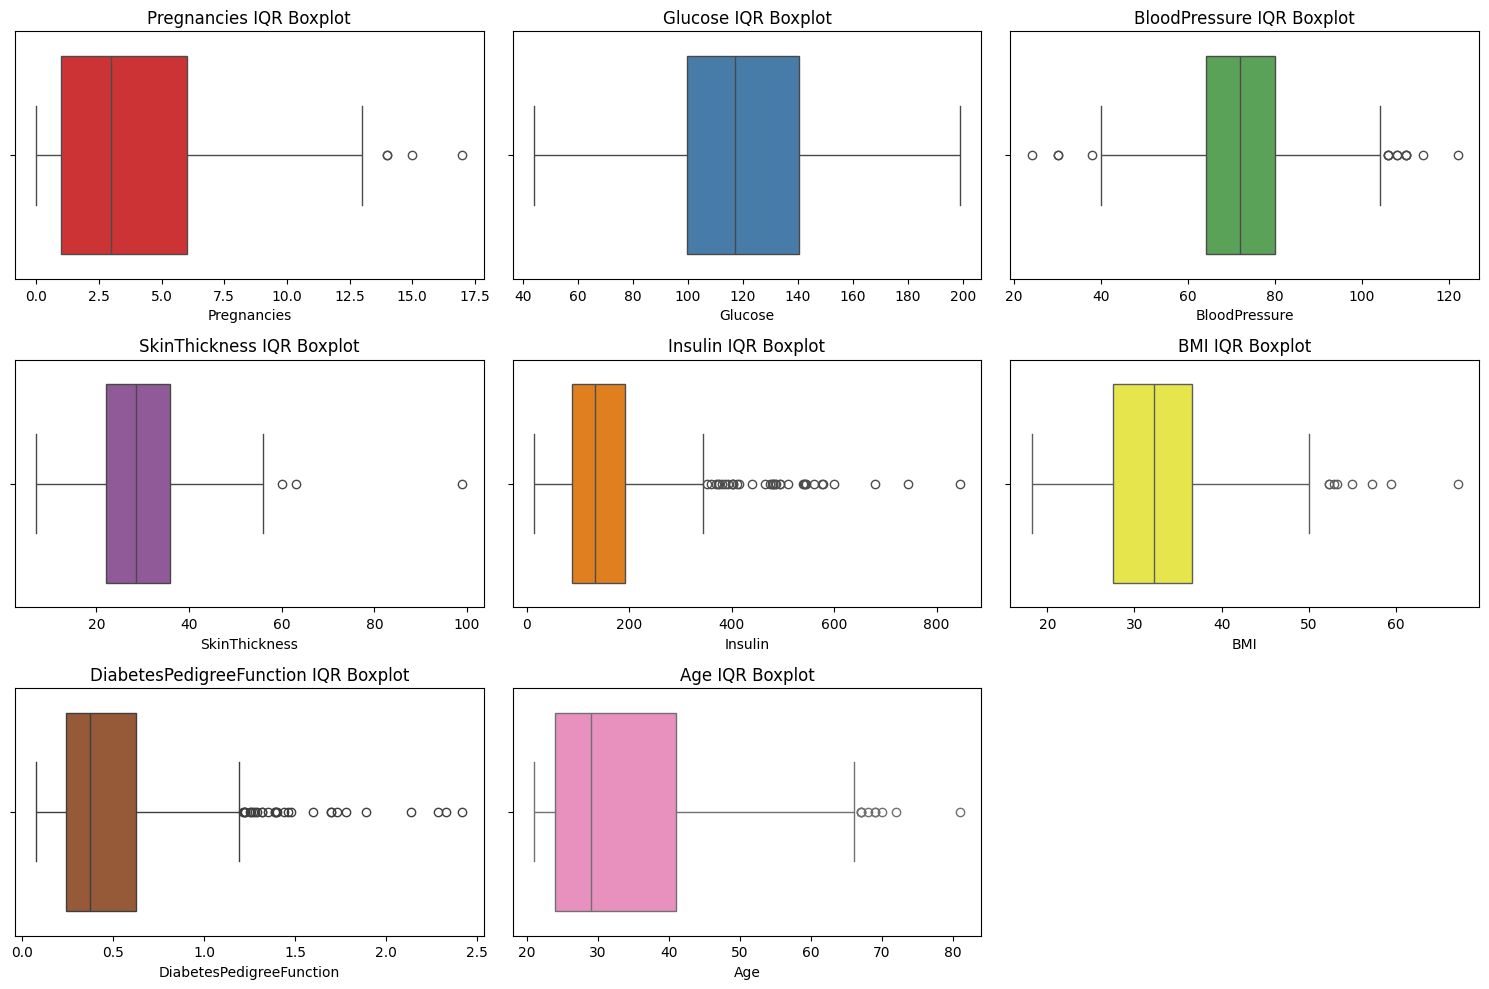

Pregnancies: 4 outliers.
Glucose: 0 outliers.
BloodPressure: 14 outliers.
SkinThickness: 3 outliers.
Insulin: 35 outliers.
BMI: 8 outliers.
DiabetesPedigreeFunction: 29 outliers.
Age: 9 outliers.


In [41]:

# Daftar kolom yang ingin divisualisasikan
kolom_2 = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
           'BMI', 'DiabetesPedigreeFunction', 'Age']

# Membuat palet warna
color_palette = sns.color_palette("Set1", len(kolom_2))

plt.figure(figsize=(15, 10))

# Menghitung IQR untuk mendeteksi outliers
Q1 = imputed_df[kolom_2].quantile(0.25)
Q3 = imputed_df[kolom_2].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas untuk outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# List untuk menyimpan jumlah outlier per kolom
outliers_counts = []

# Loop untuk membuat boxplot
for i, column in enumerate(kolom_2, 1):
    plt.subplot((len(kolom_2) + 2) // 3, 3, i)  # Mengatur grid subplot secara lebih aman
    sns.boxplot(data=imputed_df, x=column, color=color_palette[i - 1])  # Membuat boxplot per kolom

    # Menentukan data outliers
    outliers = imputed_df[(imputed_df[column] < lower_bound[column]) |
                          (imputed_df[column] > upper_bound[column])]

    # Menyimpan jumlah outlier per kolom
    outliers_counts.append(len(outliers))

    plt.xlabel(column)
    plt.title(f'{column} IQR Boxplot')

# Menyesuaikan layout agar tidak saling tumpang tindih
plt.tight_layout()
plt.show()

# Menampilkan jumlah outliers dalam bentuk teks
for col, count in zip(kolom_2, outliers_counts):
    print(f'{col}: {count} outliers.')

# Mengubah nilai outlier dengan metode RF

In [24]:
from sklearn.ensemble import RandomForestRegressor

# Salin dataframe hasil imputasi sebelumnya
df_outlier_rf = imputed_df.copy()

for col in kolom_2:
    # Hitung IQR
    Q1 = df_outlier_rf[col].quantile(0.25)
    Q3 = df_outlier_rf[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Tandai outlier sebagai NaN
    df_outlier_rf[col] = df_outlier_rf[col].where(
        (df_outlier_rf[col] >= lower) & (df_outlier_rf[col] <= upper), np.nan
    )

    # Siapkan data pelatihan (drop kolom target dari X)
    df_train = df_outlier_rf[df_outlier_rf[col].notnull()]
    df_missing = df_outlier_rf[df_outlier_rf[col].isnull()]

    if not df_missing.empty:
        X_train = df_train.drop(columns=[col])
        y_train = df_train[col]
        X_missing = df_missing.drop(columns=[col])

        # Latih Random Forest
        rf = RandomForestRegressor(n_estimators=100, random_state=42)
        rf.fit(X_train, y_train)

        # Prediksi dan isikan kembali nilai yang NaN (outlier sebelumnya)
        df_outlier_rf.loc[df_outlier_rf[col].isnull(), col] = rf.predict(X_missing)


Berikut visualisasi outlier setelah  outlier diimputasi dengan metode RF

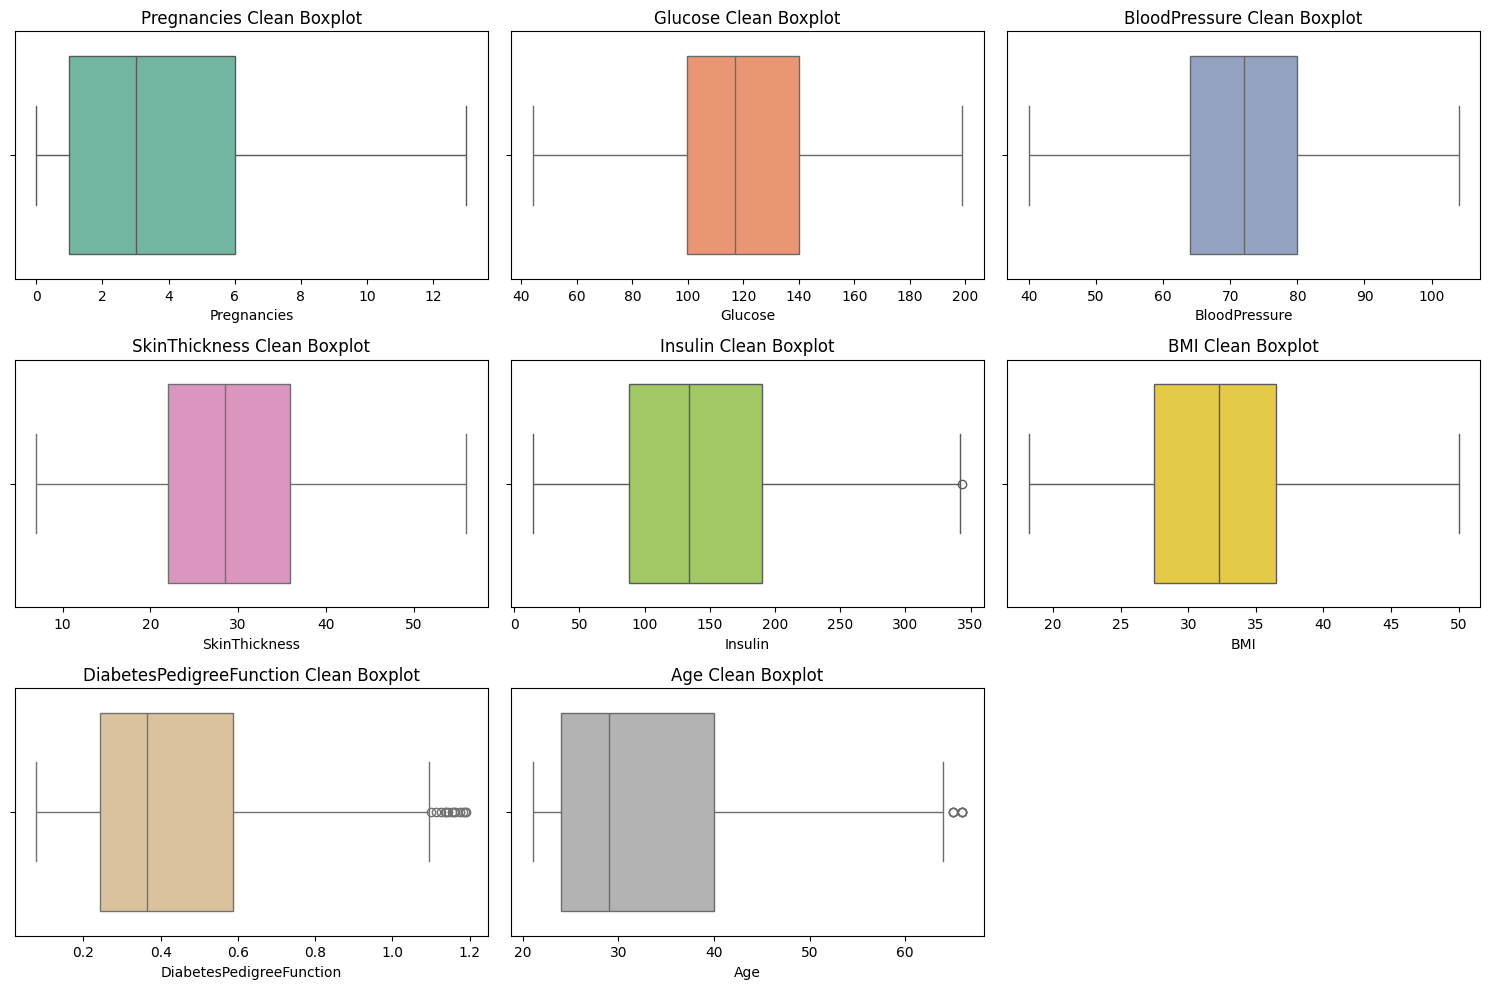

Pregnancies: 0 outliers (setelah Random Forest Imputation)
Glucose: 0 outliers (setelah Random Forest Imputation)
BloodPressure: 0 outliers (setelah Random Forest Imputation)
SkinThickness: 0 outliers (setelah Random Forest Imputation)
Insulin: 1 outliers (setelah Random Forest Imputation)
BMI: 0 outliers (setelah Random Forest Imputation)
DiabetesPedigreeFunction: 13 outliers (setelah Random Forest Imputation)
Age: 7 outliers (setelah Random Forest Imputation)


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat palet warna
color_palette = sns.color_palette("Set2", len(kolom_2))

plt.figure(figsize=(15, 10))

# List untuk menyimpan jumlah outlier baru (jika ada lagi)
new_outliers_counts = []

# Hitung ulang IQR untuk melihat distribusi baru
Q1_new = df_outlier_rf[kolom_2].quantile(0.25)
Q3_new = df_outlier_rf[kolom_2].quantile(0.75)
IQR_new = Q3_new - Q1_new
lower_new = Q1_new - 1.5 * IQR_new
upper_new = Q3_new + 1.5 * IQR_new

# Buat boxplot untuk semua kolom
for i, col in enumerate(kolom_2, 1):
    plt.subplot((len(kolom_2) + 2) // 3, 3, i)
    sns.boxplot(data=df_outlier_rf, x=col, color=color_palette[i - 1])

    # Cek ulang apakah masih ada outlier
    outliers = df_outlier_rf[(df_outlier_rf[col] < lower_new[col]) |
                             (df_outlier_rf[col] > upper_new[col])]
    new_outliers_counts.append(len(outliers))

    plt.title(f'{col} Clean Boxplot')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

# Tampilkan jumlah outlier setelah imputasi
for col, count in zip(kolom_2, new_outliers_counts):
    print(f'{col}: {count} outliers (setelah Random Forest Imputation)')


# Visualisasi setelah outlier ditangani menggunakan metode RF

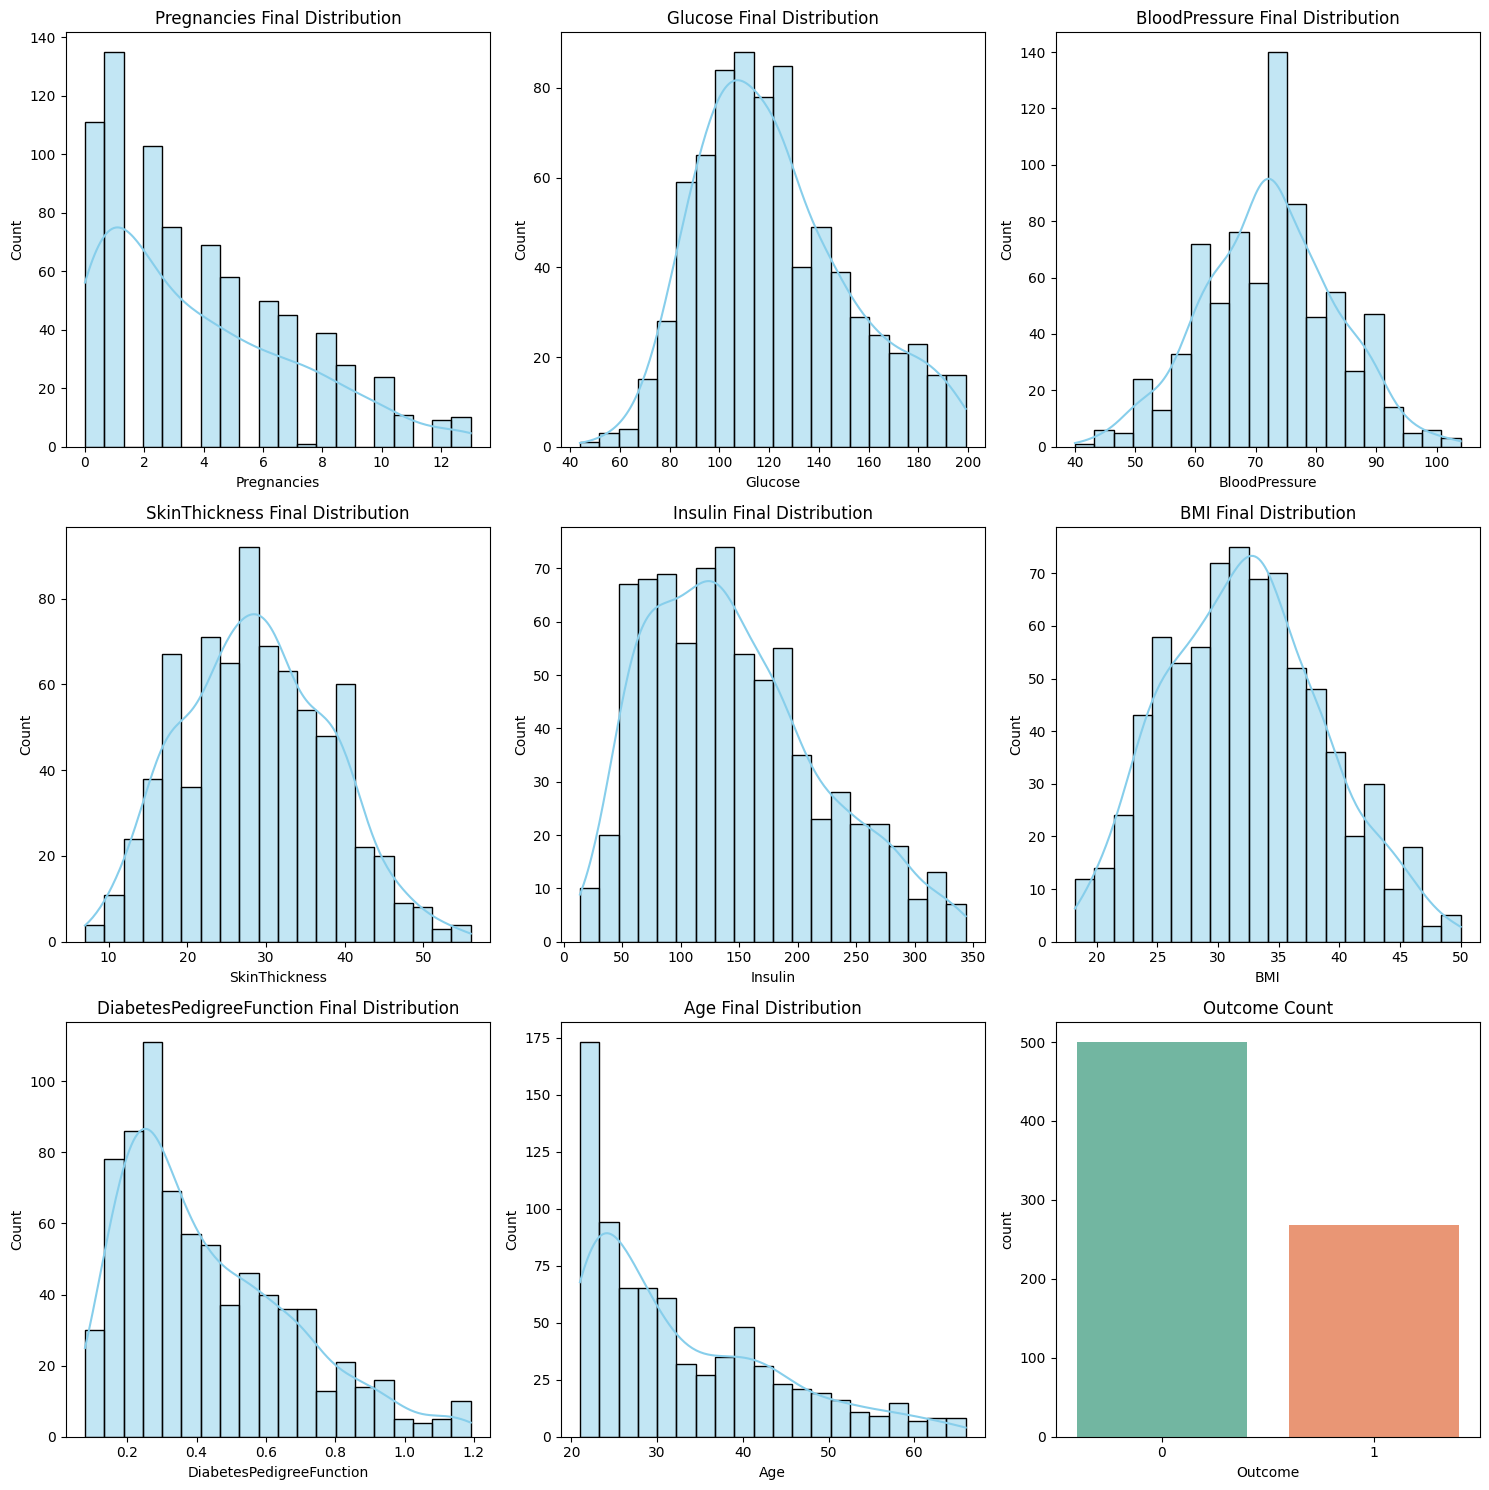

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,GlucoseLevel
0,6.0,148.0,72.0,35.00,171.69,33.6,0.62700,50.0,1,Diabetes
1,1.0,85.0,66.0,29.00,50.45,26.6,0.35100,31.0,0,Normal
2,8.0,183.0,64.0,19.66,256.55,23.3,0.67200,32.0,1,Diabetes
3,1.0,89.0,66.0,23.00,94.00,28.1,0.16700,21.0,0,Normal
4,0.0,137.0,40.0,35.00,168.00,43.1,0.52594,33.0,1,Diabetes
...,...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.00,180.00,32.9,0.17100,63.0,0,Pradiabetes
764,2.0,122.0,70.0,27.00,185.97,36.8,0.34000,27.0,0,Pradiabetes
765,5.0,121.0,72.0,23.00,112.00,26.2,0.24500,30.0,0,Pradiabetes
766,1.0,126.0,60.0,26.13,139.73,30.1,0.34900,47.0,1,Diabetes


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menyiapkan plot
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Menyusun fitur dan jenis visualisasi
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
            'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
plot_types = ['hist', 'hist', 'hist', 'hist', 'hist',
              'hist', 'hist', 'hist', 'countplot']

# Membuat plot untuk setiap fitur
for i, feature in enumerate(features):
    ax = axes[i // 3, i % 3]  # Menentukan posisi plot
    if plot_types[i] == 'hist':
        sns.histplot(df_outlier_rf[feature], kde=True, ax=ax, color='skyblue', bins=20)
        ax.set_title(f'{feature} Final Distribution')
    elif plot_types[i] == 'countplot':
        sns.countplot(x=df_outlier_rf[feature], ax=ax, palette='Set2')
        ax.set_title(f'{feature} Count')

plt.tight_layout()
plt.show()

# Tampilkan sekilas dataframe hasil akhir
df_outlier_rf


# Corelation Matrix

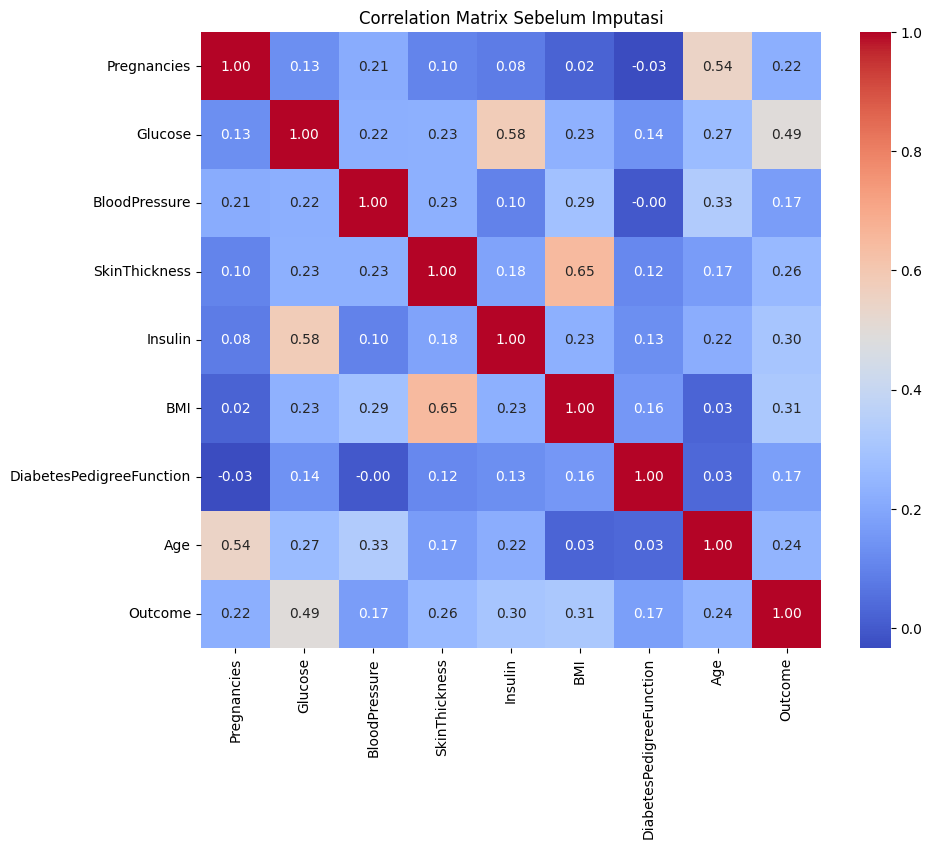

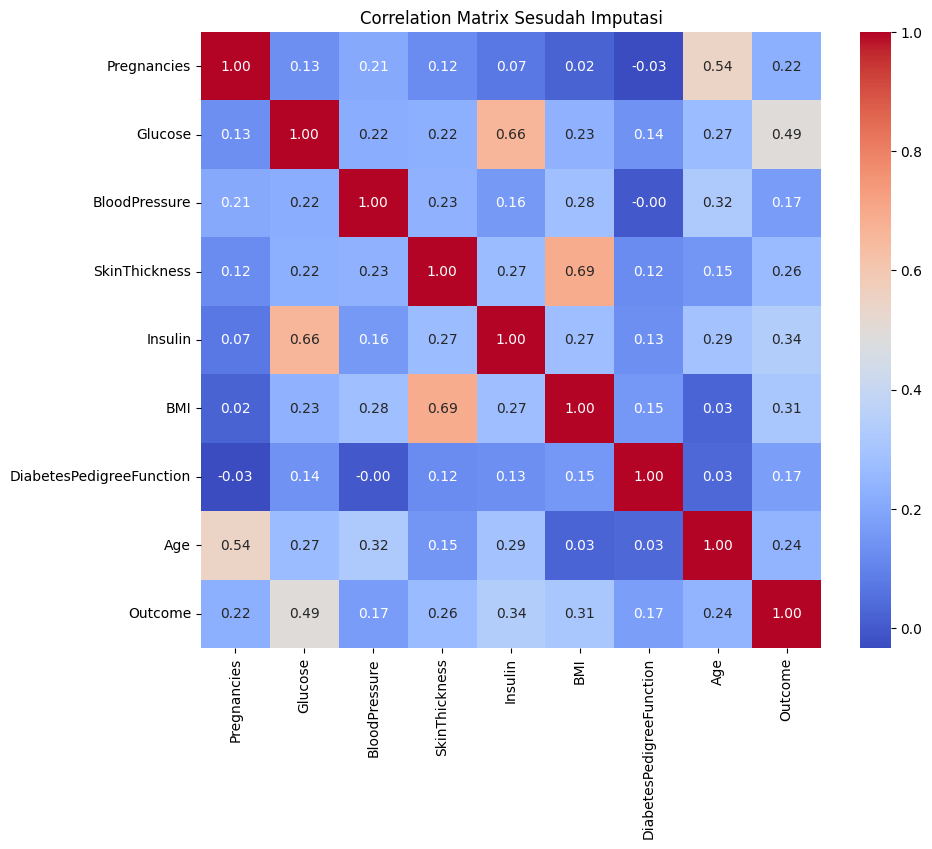

In [28]:

# Korelasi sebelum imputasi
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Sebelum Imputasi")
plt.show()

# Korelasi sesudah imputasi
plt.figure(figsize=(10, 8))
sns.heatmap(imputed_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Sesudah Imputasi")
plt.show()

# Normalisasi Data


In [29]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Inisialisasi scaler
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

# Normalisasi dengan Standard Scaler
df_standard_scaled = pd.DataFrame(scaler_standard.fit_transform(imputed_df), columns=imputed_df.columns)

# Normalisasi dengan MinMax Scaler
df_minmax_scaled = pd.DataFrame(scaler_minmax.fit_transform(imputed_df), columns=imputed_df.columns)

# Cek statistik hasil normalisasi
print("Statistik Standard Scaler:\n", df_standard_scaled.describe())
print("\nStatistik MinMax Scaler:\n", df_minmax_scaled.describe())


Statistik Standard Scaler:
         Pregnancies       Glucose  BloodPressure  SkinThickness       Insulin  \
count  7.680000e+02  7.680000e+02   7.680000e+02   7.680000e+02  7.680000e+02   
mean  -6.476301e-17  4.625929e-18   5.782412e-18  -1.942890e-16 -5.088522e-17   
std    1.000652e+00  1.000652e+00   1.000652e+00   1.000652e+00  1.000652e+00   
min   -1.141852e+00 -2.552931e+00  -4.002619e+00  -2.246406e+00 -1.386624e+00   
25%   -8.448851e-01 -7.201630e-01  -6.937615e-01  -7.086313e-01 -6.713295e-01   
50%   -2.509521e-01 -1.530732e-01  -3.198993e-02  -3.969916e-02 -2.216650e-01   
75%    6.399473e-01  6.112653e-01   6.297816e-01   7.143232e-01  3.425933e-01   
max    3.906578e+00  2.542658e+00   4.104082e+00   7.185280e+00  6.688073e+00   

                BMI  DiabetesPedigreeFunction           Age       Outcome  
count  7.680000e+02              7.680000e+02  7.680000e+02  7.680000e+02  
mean   2.613650e-16              2.451743e-16  1.931325e-16  7.401487e-17  
std    1.00065

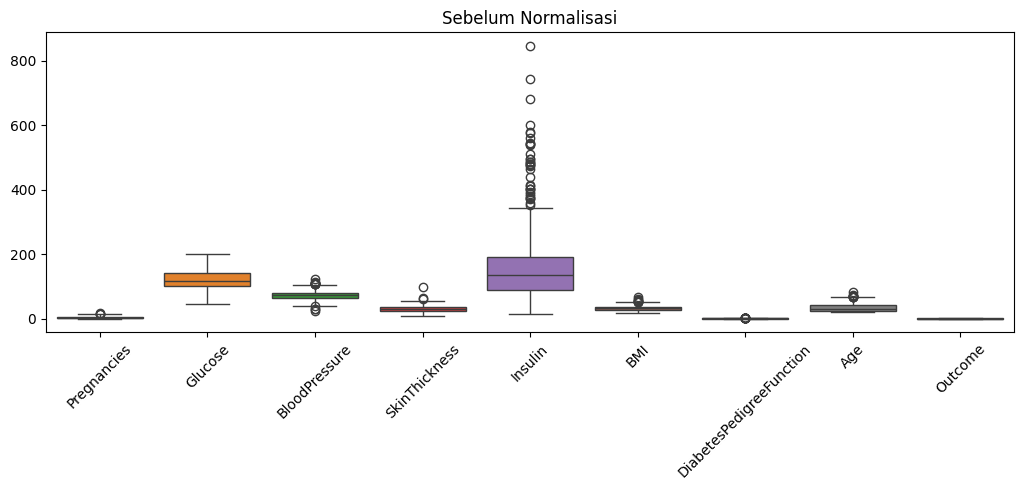

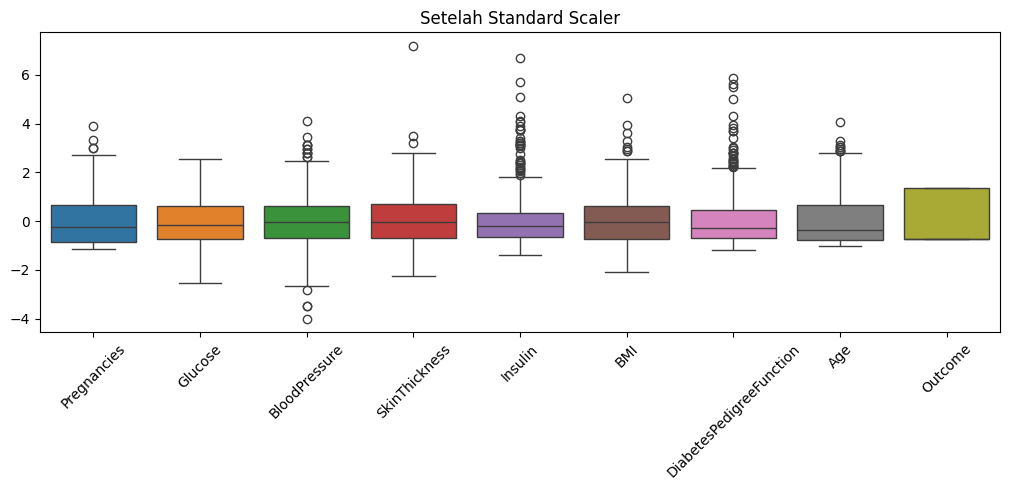

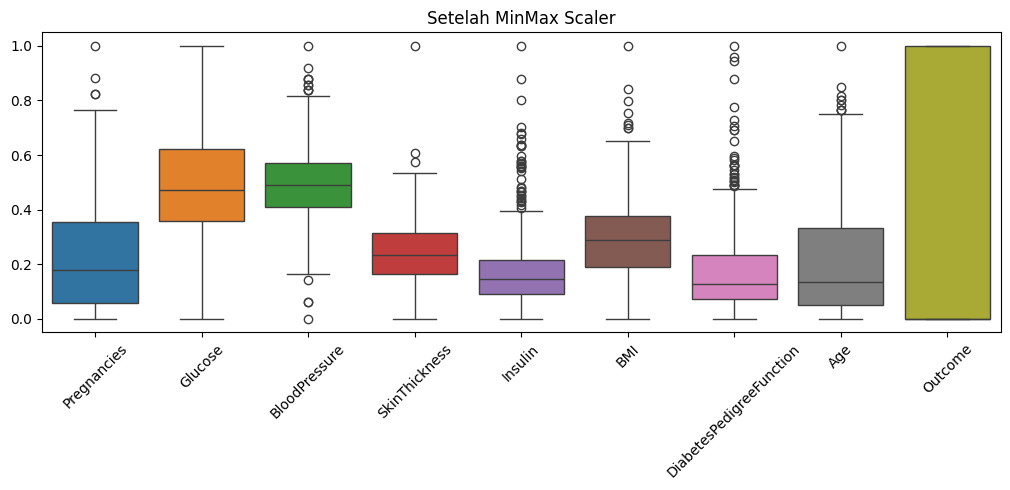

In [30]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Inisialisasi scaler
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

# Normalisasi dengan Standard Scaler
df_standard_scaled = pd.DataFrame(scaler_standard.fit_transform(imputed_df), columns=imputed_df.columns)

# Normalisasi dengan MinMax Scaler
df_minmax_scaled = pd.DataFrame(scaler_minmax.fit_transform(imputed_df), columns=imputed_df.columns)

# --- Visualisasi Boxplot ---
plt.figure(figsize=(30, 5))
plt.subplot(1, 3, 1)
sns.boxplot(data=imputed_df)
plt.title("Sebelum Normalisasi")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

plt.figure(figsize=(30, 5))
plt.subplot(1, 3, 2)
sns.boxplot(data=df_standard_scaled)
plt.title("Setelah Standard Scaler")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

plt.figure(figsize=(30, 5))
plt.subplot(1, 3, 3)
sns.boxplot(data=df_minmax_scaled)
plt.title("Setelah MinMax Scaler")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# Encoding


label encoding

In [31]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Memuat dataset
df = pd.read_csv('diabetes.csv')  # Sesuaikan dengan path file Anda

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Melakukan Label Encoding pada kolom 'Outcome' yang berisi kategori 0 dan 1
df['Outcome_encoded'] = label_encoder.fit_transform(df['Outcome'])

# Menampilkan hasil encoding
print(df[['Outcome', 'Outcome_encoded']].head())


   Outcome  Outcome_encoded
0        1                1
1        0                0
2        1                1
3        0                0
4        1                1


one-hot encoding

In [32]:
# Memuat dataset
df = pd.read_csv('diabetes.csv')  # Sesuaikan dengan lokasi dataset Anda

# Melakukan One-Hot Encoding pada kolom 'Outcome'
df_encoded = pd.get_dummies(df, columns=['Outcome'], prefix='Outcome')

# Menampilkan hasil encoding
print(df_encoded.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome_0  Outcome_1  
0                     0.627   50      False       True  
1                     0.351   31       True      False  
2                     0.672   32      False       True  
3                     0.167   21       True      False  
4                     2.288   33      False       True  


# **Visualisasi**

# Kategori status diabetes berdasarkan Kadar Glukosa saat puasa

In [33]:
def categorize_glucose(glucose):
    if 70 <= glucose <= 99:
        return 'Normal'
    elif 100 <= glucose <= 125:
        return 'Pradiabetes'
    elif glucose >= 126:
        return 'Diabetes'
    else:
        return 'Tidak Valid'  # Untuk menangani nilai yang tidak sesuai

df_outlier_rf['GlucoseLevel'] = df_outlier_rf['Glucose'].apply(categorize_glucose)

df_outlier_rf

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,GlucoseLevel
0,6.0,148.0,72.0,35.00,171.69,33.6,0.62700,50.0,1,Diabetes
1,1.0,85.0,66.0,29.00,50.45,26.6,0.35100,31.0,0,Normal
2,8.0,183.0,64.0,19.66,256.55,23.3,0.67200,32.0,1,Diabetes
3,1.0,89.0,66.0,23.00,94.00,28.1,0.16700,21.0,0,Normal
4,0.0,137.0,40.0,35.00,168.00,43.1,0.52594,33.0,1,Diabetes
...,...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.00,180.00,32.9,0.17100,63.0,0,Pradiabetes
764,2.0,122.0,70.0,27.00,185.97,36.8,0.34000,27.0,0,Pradiabetes
765,5.0,121.0,72.0,23.00,112.00,26.2,0.24500,30.0,0,Pradiabetes
766,1.0,126.0,60.0,26.13,139.73,30.1,0.34900,47.0,1,Diabetes


# Distribusi Glukosa berdasarkan Outcome

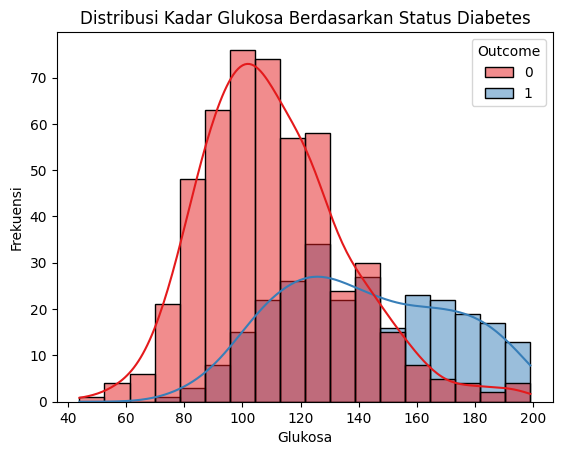

In [34]:
sns.histplot(data=df_outlier_rf, x='Glucose', hue='Outcome', kde=True, palette='Set1')
plt.title('Distribusi Kadar Glukosa Berdasarkan Status Diabetes')
plt.xlabel('Glukosa')
plt.ylabel('Frekuensi')
plt.show()




Dari grafik tersebut, pada kada glukosa diatas 120 jumlah yang terkena diabetes mulai meningkat. Dapat disimpulkan bahwa orang yang memiliki kadar Glukosa (>150) cenderung positif diabetes

# Hubungan Glukosa, Insulin, dan Outcome

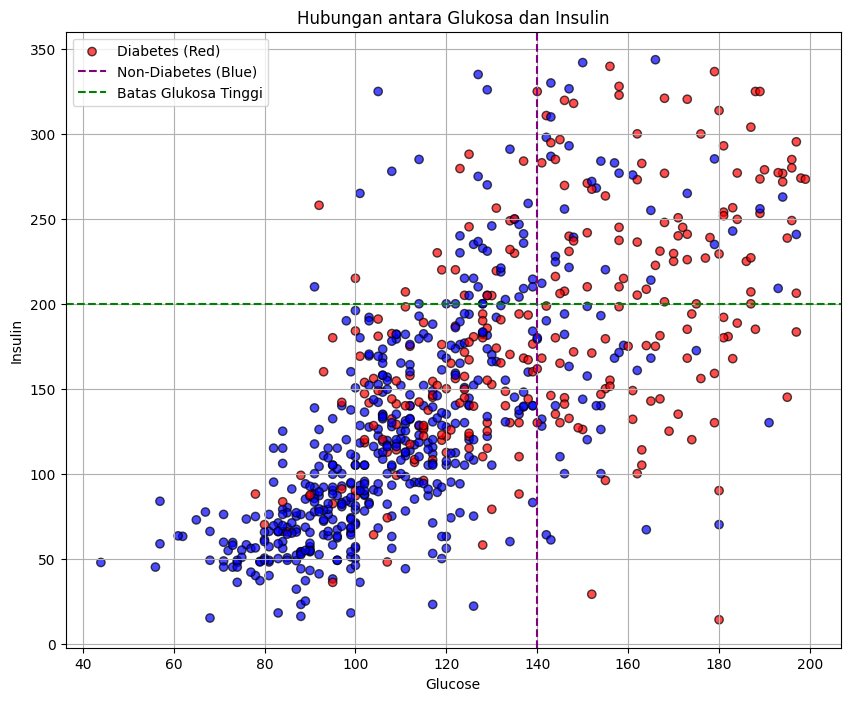

In [35]:
import matplotlib.pyplot as plt

# Plot scatter Glucose vs Insulin
plt.figure(figsize=(10, 8))
colors = ['red' if outcome == 1 else 'blue' for outcome in df_outlier_rf["Outcome"]]
plt.scatter(df_outlier_rf["Glucose"], df_outlier_rf["Insulin"], c=colors, alpha=0.7, edgecolors="k")

# Menambahkan garis batas
plt.axvline(x=140, color="purple", linestyle="dashed", label="Batas Glukosa Tinggi (140)")
plt.axhline(y=200, color="green", linestyle="dashed", label="Batas Insulin Tinggi (200)")

# Label dan judul
plt.xlabel("Glucose")
plt.ylabel("Insulin")
plt.title("Hubungan antara Glukosa dan Insulin")
plt.legend(["Diabetes (Red)", "Non-Diabetes (Blue)", "Batas Glukosa Tinggi", "Batas Insulin Tinggi"])
plt.grid(True)

# Menampilkan plot
plt.show()



Grafik ini menunjukkan hubungan antara kadar **Glukosa** dan **Insulin** dalam tubuh, yang divisualisasikan dalam bentuk scatter plot. Titik-titik dalam grafik ini dikategorikan berdasarkan **status diabetes**:

- **Merah**: Pasien dengan **diabetes**.
- **Biru**: Pasien **non-diabetes**.

## Analisis
1. **Pola Peningkatan Insulin & Glukosa**  
   - Terdapat korelasi positif antara kadar **Glukosa** dan **Insulin**.  
   - Semakin tinggi kadar **Glukosa**, kadar **Insulin** juga cenderung meningkat.

2. **Batas Kategori Diabetes**
   - Garis **ungu putus-putus** menandakan batas **glukosa tinggi** pada **140 mg/dL**, yang merupakan ambang batas untuk **prediabetes dan diabetes**.
   - Garis **hijau putus-putus** menunjukkan kadar **insulin tinggi** di **200 μU/mL**, yang sering ditemukan pada individu dengan resistensi insulin.

3. **Distribusi Data**
   - **Sebagian besar pasien non-diabetes (biru)** memiliki kadar **Glukosa di bawah 140 mg/dL** dan kadar **Insulin yang bervariasi**.
   - **Pasien diabetes (merah)** cenderung memiliki kadar **Glukosa lebih tinggi dari 140 mg/dL** dan sering kali juga memiliki kadar **Insulin tinggi**.

## Kesimpulan
- Pasien **diabetes** (merah) cenderung memiliki **Glukosa dan Insulin tinggi**, mengindikasikan adanya **resistensi insulin**.
- Pasien **non-diabetes** (biru) memiliki **rentang glukosa lebih rendah**, dengan **insulin yang bervariasi** tergantung kondisi metaboliknya.
- **Pengelompokan ini membantu memahami risiko diabetes** dan bagaimana kadar **glukosa serta insulin** saling berhubungan dalam tubuh.


# Rata-rata usia pasien diabetes vs non-diabetes.

In [36]:
df_outlier_rf.groupby('Outcome')['Age'].mean()


,Age
Outcome,
0,30.831000
1,36.860299


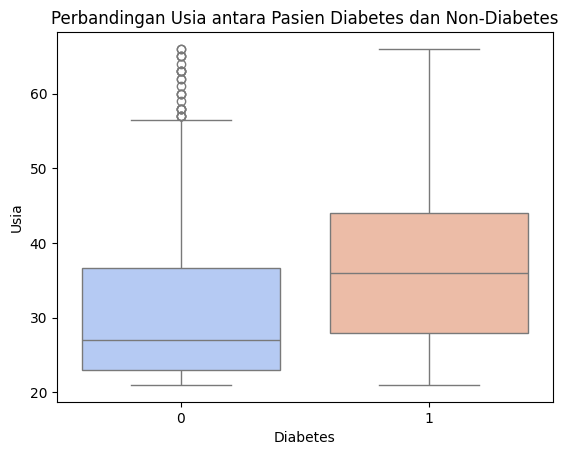

In [ ]:
sns.boxplot(data=df_outlier_rf, x='Outcome', y='Age', palette='coolwarm')
plt.title('Perbandingan Usia antara Pasien Diabetes dan Non-Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Usia')
plt.show()

Berdasarkan boxplot di atas:

Pasien diabetes (1) memiliki usia median lebih tinggi (~40 tahun) dibandingkan dengan pasien non-diabetes (0) yang median usianya sekitar 30 tahun.

Distribusi usia pasien diabetes lebih lebar, menunjukkan bahwa diabetes diderita oleh berbagai rentang usia, tetapi mayoritas terjadi pada usia di atas 30 tahun.

Banyak outlier pada kelompok non-diabetes, yang menandakan bahwa ada individu non-diabetes yang berusia lebih tua namun tetap tidak menderita diabetes.

Kesimpulan:

Risiko diabetes meningkat seiring bertambahnya usia.

Pencegahan dan skrining dini lebih penting bagi kelompok usia 30 tahun ke atas untuk mengurangi kemungkinan terkena diabetes.

# Distribusi nilai DPA berdasarkan Outcome

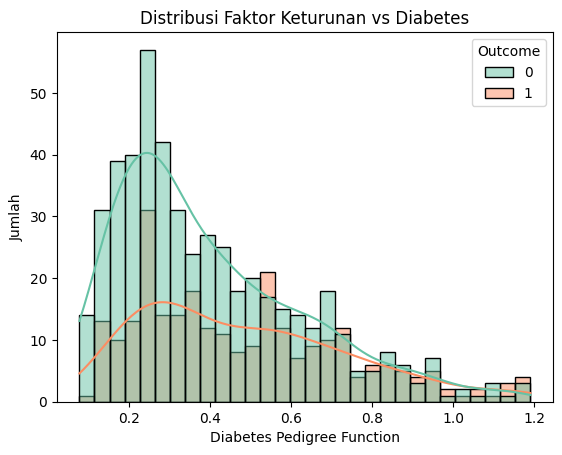

In [ ]:
sns.histplot(data=df_outlier_rf, x='DiabetesPedigreeFunction', hue='Outcome', kde=True, bins=30,  palette="Set2")
plt.title('Distribusi Faktor Keturunan vs Diabetes')
plt.xlabel('Diabetes Pedigree Function')
plt.ylabel('Jumlah')
plt.show()


Semakin tinggi nilai DPF (>0.5) maka resiko terkena diabetes juga tinggi